<a href="https://colab.research.google.com/github/clee630/MMD6020/blob/main/MMD6020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basé sur**:


*   https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

*   https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b
*   https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide

*   https://machinelearningmastery.com/calculate-feature-importance-with-python/

*   https://towardsdatascience.com/exploring-the-various-ways-to-evaluate-features-for-feature-selection-1142f7788aeb
*   https://medium.com/@biman.pph/two-sample-t-tests-power-effect-size-and-sample-size-calculator-in-python-1abbf87ad100


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!python --version

Python 3.10.12


In [2]:
data = pd.read_csv('Vanderbilt_DSP_data.csv')
data.head()

ID Gender  AgeMonths Race SES_mom_occupation_score SES_mom_education  \
0   1      F      36.90    2                        7                 7   
1   2      F      41.33    5                        7                 6   
2   3      M      59.63    5                        8                 6   
3   4      F      66.76    5                        8                 6   
4   5      M      48.49    5                        1                 7   

  SES_dad_occupation_score SES_dad_education  hearing_puretone_right_ear  \
0                        8                 7                           1   
1                        9                 6                           1   
2                        4                 5                           1   
3                        9                 7                           1   
4                        9                 7                           2   

   hearing_puretone_left_ear  ...  disfluency_aspcvj  disfluency_ispcvj  \
0                          1  ...                  2                  0   
1                          0  ...                  1                  0   
2                          1  ...                  0                  0   
3                          1  ...                  0                  0   
4                          2  ...                 26                  1   

   disfluency_oth_sldcvj  disfluency_prcvj disfluency_intcvj  \
0                      0                13                21   
1                      0                 5                 4   
2                      0                14                18   
3                      0                 4                 2   
4                      0                 1                 3   

   disfluency_revcvj  disfluency_oth_nsldcvj  disfluency_mostcommoncvj  \
0                 10                       0                         6   
1                  8                       0                         7   
2                 12                       0                         6   
3                  7                       0                         2   
4                  6                       0                         1   

   disfluency_sldp100wordscvj  talkergroup_disfluencycvj  
0                       3.516                          1  
1                       1.099                          0  
2                       1.287                          0  
3                       1.720                          0  
4                      24.808                          1  

[5 rows x 120 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Columns: 120 entries, ID to talkergroup_disfluencycvj
dtypes: float64(106), int64(14)
memory usage: 129.5 KB


In [ ]:
column_names = data.columns
for column_name in column_names:
    print(column_name)

ID
Gender
AgeMonths
Race
SES_mom_occupation_score
SES_mom_education
SES_dad_occupation_score
SES_dad_education
hearing_puretone_right_ear
hearing_puretone_left_ear
SSI_frequency
SSI_duration
SSI_physical
SSI_total
SSI_severity
talkergroup_SSI
disfluency_totalwords
disfluency_ssr
disfluency_wwr
disfluency_asp
disfluency_isp
disfluency_oth_sld
disfluency_pr
disfluency_int
disfluency_rev
disfluency_oth_nsld
disfluency_mostcommon
disfluency_sldper100words
disfluency_sldper100syll
talkergroup_disfluency
gfta_raw
gfta_standard
gfta_percentile
gfta_age_y;m
gfta_age_total_months
ppvt_raw
ppvt_standard
ppvt_percentile
ppvt_stanine
ppvt_age_y;m
ppvt_age_total_months
evt_raw
evt_standard
evt_percentile
evt_stanine
evt_age_y;m
evt_age_total_months
teld_rec_raw
teld_rec_standard
teld_rec_age_y;m
teld_rec_age_total_months
teld_rec_percentile
teld_exp_raw
teld_exp_standard
teld_exp_age_y;m
teld_exp_age_total_months
teld_exp_percentile
teld_spokenlang_standard
teld_spokenlang_percentile
tocs_1_total
t

In [5]:
categorical_columns = [
    'ID', 'Gender', 'Race', 'talkergroup_SSI', 'talkergroup_disfluency',
    'gfta_age_y;m', 'ppvt_age_y;m', 'evt_age_y;m', 'teld_rec_age_y;m', 'teld_exp_age_y;m',
]

In [3]:
linguistic_variables = [
    'gfta_raw', 'gfta_standard', 'gfta_percentile', 'gfta_age_total_months',
    'ppvt_standard', 'ppvt_percentile', 'ppvt_stanine', 'ppvt_age_total_months',
    'evt_raw', 'evt_standard', 'evt_percentile', 'evt_stanine', 'evt_age_total_months',
    'teld_rec_raw', 'teld_rec_standard', 'teld_rec_age_total_months', 'teld_rec_percentile',
    'teld_exp_raw', 'teld_exp_standard', 'teld_exp_age_total_months', 'teld_exp_percentile',
    'teld_spokenlang_standard', 'teld_spokenlang_percentile'
]

emotional_variables = [
    'CBQ_RothSurgency', 'CBQ_RothEffCon', 'CBQ_RothNegAff', 'CBQ_WalNegAff', 'CBQ_WalReg',
    'CBQ_WalAttention', 'CBCL_Emot_Reactive', 'CBCL_Anxious_Depressed', 'CBCL_Somatic_Complaints',
    'CBCL_Withdrawn', 'CBCL_Sleep_Problems', 'CBCL_Attention_Problems', 'CBCL_Aggressive_Behavior',
    'CBCL_Internal', 'CBCL_External', 'CCS_dist', 'CCS_aggress', 'CCS_vent', 'CCS_seeksupp',
    'CCS_inscop', 'BSQ_activity', 'BSQ_rhythmicity', 'BSQ_approach', 'BSQ_adaptibility',
    'BSQ_intensity', 'BSQ_mood', 'BSQ_persistence', 'BSQ_distraction', 'BSQ_threshold',
    'BSQ_emotion_reactivity', 'BSQ_attention_regulation', 'BSQ_emotion_regulation', 'tcs_total'
]

fluency_variables = [
    'disfluency_totalwords', 'disfluency_ssr', 'disfluency_wwr', 'disfluency_asp', 'disfluency_isp',
    'disfluency_oth_sld', 'disfluency_pr', 'disfluency_int', 'disfluency_rev', 'disfluency_oth_nsld',
    'disfluency_sldper100words', 'disfluency_sldper100syll', 'SSI_frequency', 'SSI_duration',
    'SSI_physical', 'SSI_total', 'SSI_severity', 'disfluency_totalwordscvj', 'disfluency_ssrcvj',
    'disfluency_wwrcvj', 'disfluency_aspcvj', 'disfluency_ispcvj', 'disfluency_oth_sldcvj',
    'disfluency_prcvj', 'disfluency_intcvj', 'disfluency_revcvj', 'disfluency_oth_nsldcvj',
    'disfluency_sldp100wordscvj', 'tocs_1_total', 'tocs_2_total', 'kc_1', 'kc_2', 'kc_3', 'kc_4',
    'kc_5', 'kc_6', 'kc_7', 'kc_8', 'kc_9', 'kc_10', 'kc_11', 'kc_12', 'kc_total'
]

demographic_variables = [
    'AgeMonths', 'SES_mom_occupation_score', 'SES_mom_education', 'SES_dad_occupation_score',
    'SES_dad_education', 'hearing_puretone_right_ear', 'hearing_puretone_left_ear'
]

# Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

label_encoder = LabelEncoder()

#Convert categorical to numeric
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

#Clean function
def clean_numeric_value(value):
    if isinstance(value, str):
        value = value.replace('<', '').replace('>', '')
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

for col in (
    linguistic_variables + emotional_variables +
    fluency_variables + demographic_variables
):
    data[col] = data[col].map(clean_numeric_value)

#Columns to impute missing values
impute_columns = (
    linguistic_variables + emotional_variables +
    fluency_variables + demographic_variables
)

#SimpleImputer with'mean'
imputer = SimpleImputer(strategy='mean')

#Fit and transform imputer
data[impute_columns] = imputer.fit_transform(data[impute_columns])

#Standardize numerical variables
scaler = StandardScaler()

#Loop through columns to apply StandardScaler
for col in (
    linguistic_variables + emotional_variables +
    fluency_variables + demographic_variables
):
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

# Exploratory Data Analysis

In [ ]:
print(data.describe())

               ID      Gender     AgeMonths        Race  \
count  138.000000  138.000000  1.380000e+02  138.000000   
mean    68.500000    0.623188 -3.700743e-17    3.702899   
std     39.981246    0.486352  1.003643e+00    0.946830   
min      0.000000    0.000000 -1.386729e+00    0.000000   
25%     34.250000    0.000000 -7.810093e-01    4.000000   
50%     68.500000    1.000000 -1.112585e-01    4.000000   
75%    102.750000    1.000000  5.324798e-01    4.000000   
max    137.000000    1.000000  2.722676e+00    5.000000   

       SES_mom_occupation_score  SES_mom_education  SES_dad_occupation_score  \
count              1.380000e+02       1.380000e+02              1.380000e+02   
mean               9.975917e-17       3.668563e-16              9.332309e-17   
std                1.003643e+00       1.003643e+00              1.003643e+00   
min               -1.496987e+00      -3.039400e+00             -2.799646e+00   
25%               -1.172482e+00      -3.178457e-01             -2.16

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Columns: 120 entries, ID to talkergroup_disfluencycvj
dtypes: float64(106), int64(14)
memory usage: 129.5 KB
None


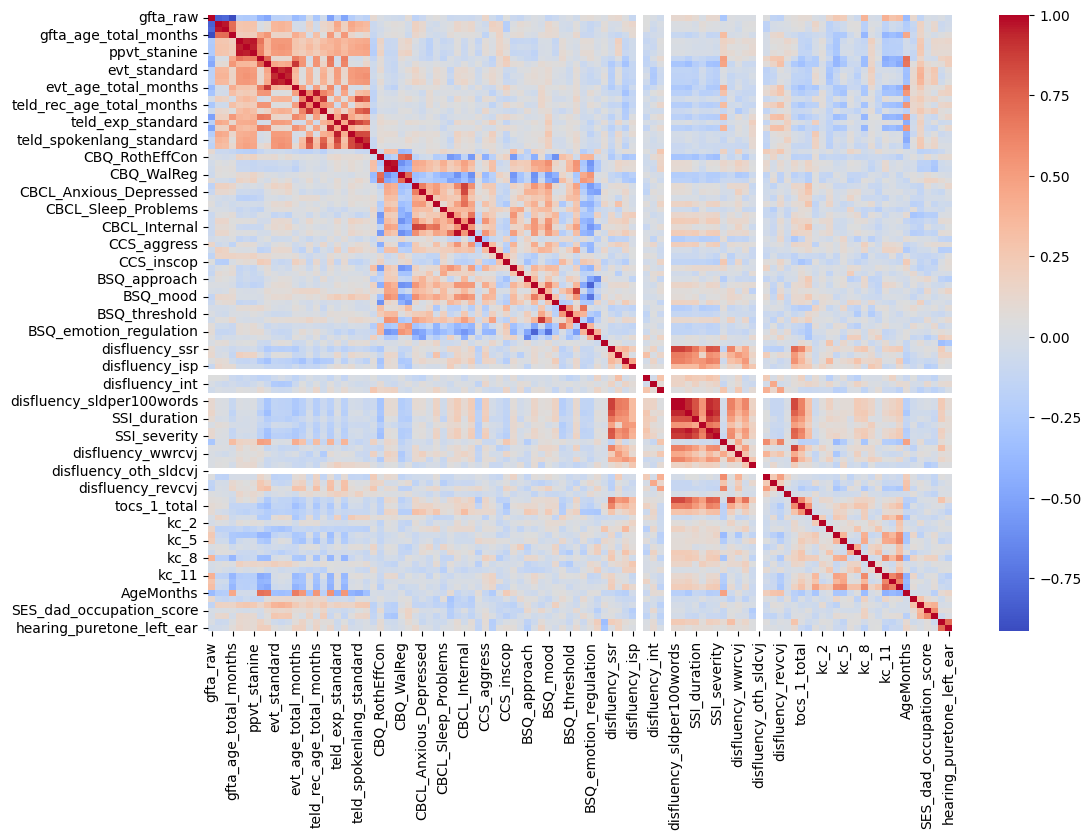

In [ ]:
#Correlation matrix
variables = (
    linguistic_variables +
    emotional_variables +
    fluency_variables +
    demographic_variables
)

corr_matrix = data[variables].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    fmt=".2f"
)
plt.show()


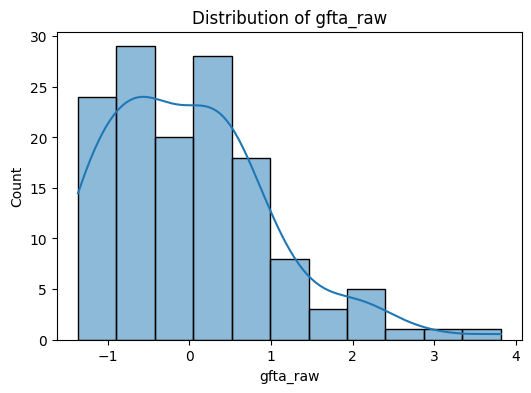

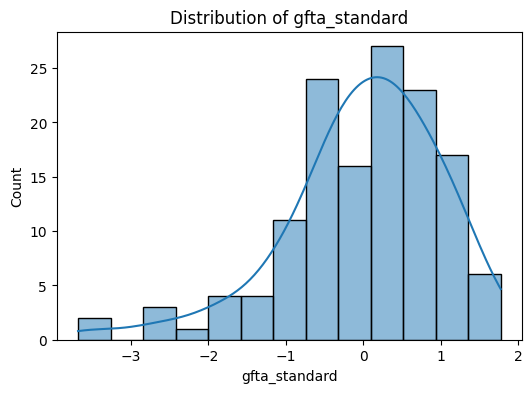

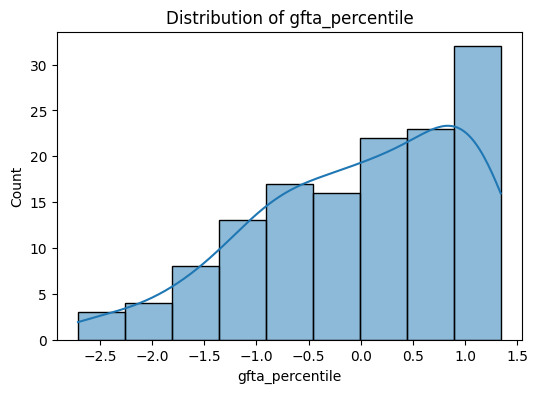

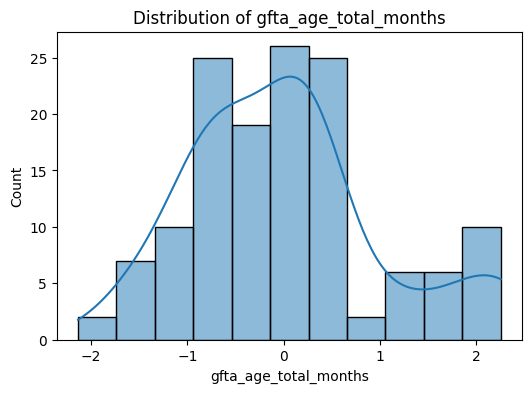

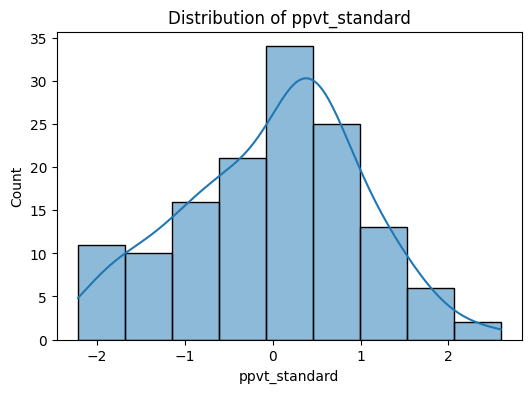

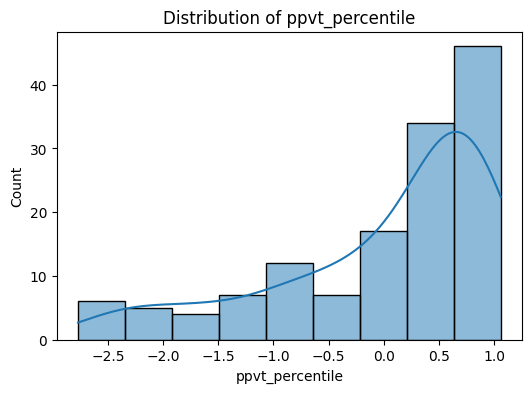

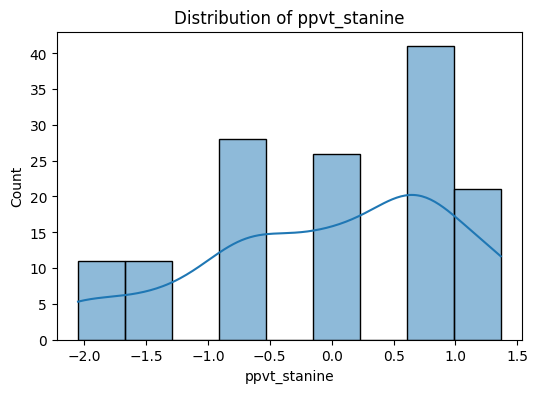

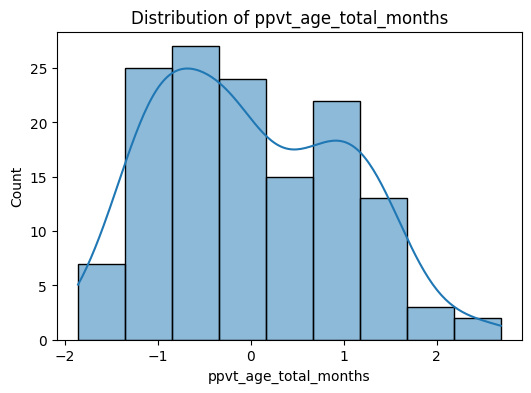

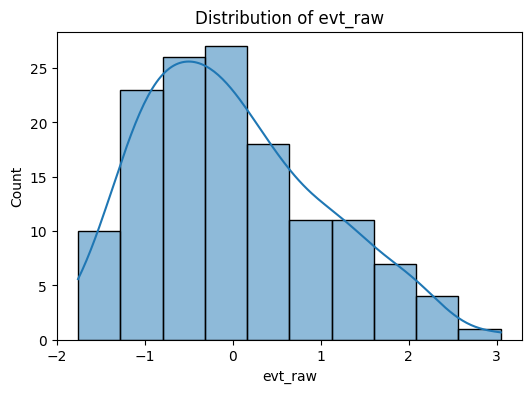

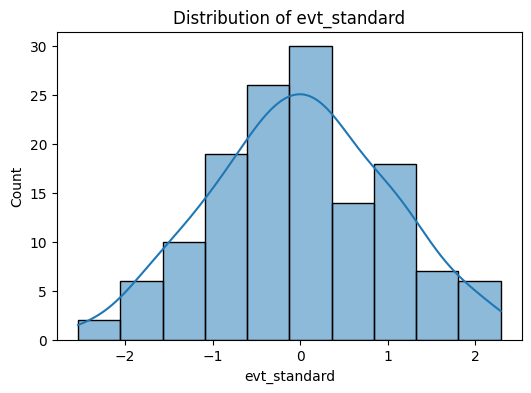

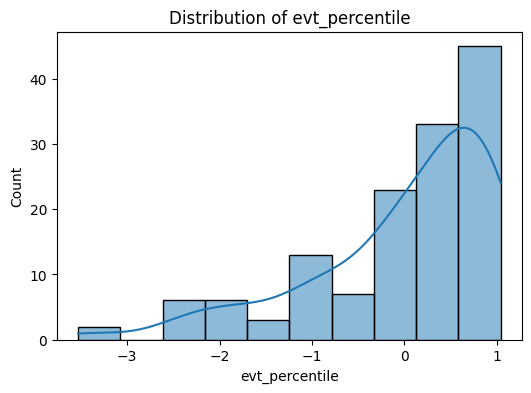

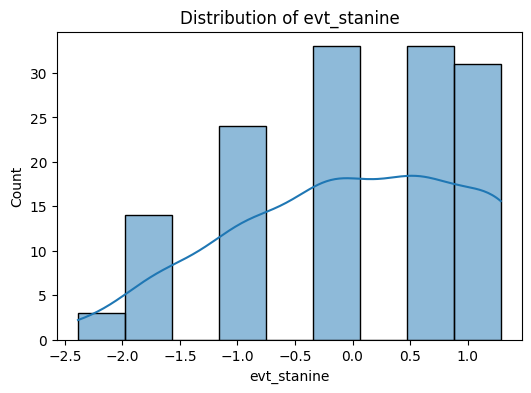

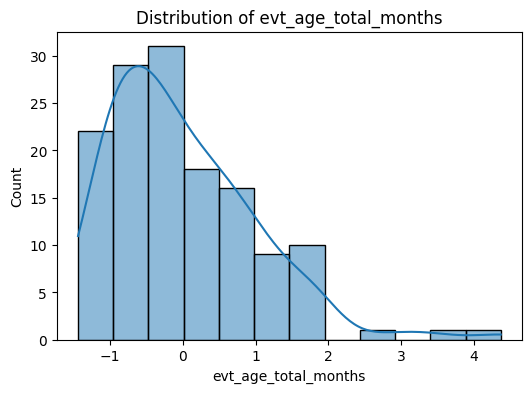

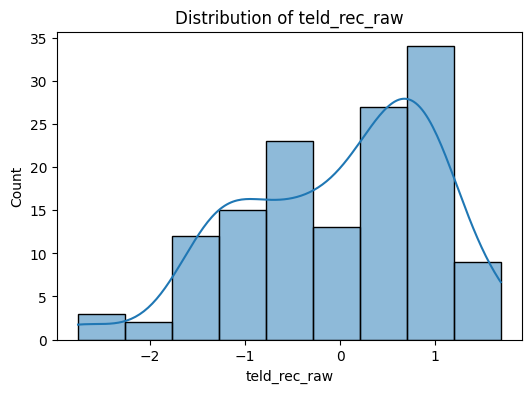

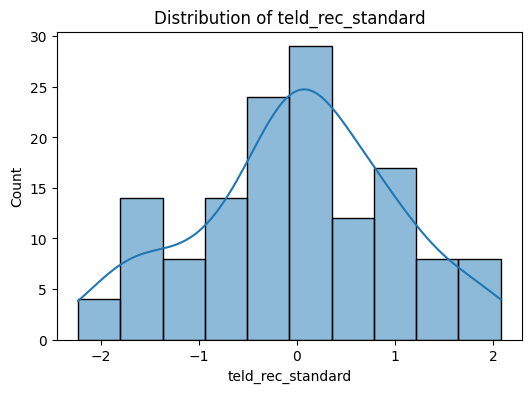

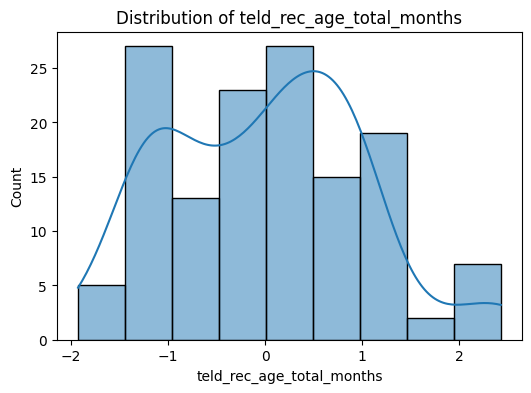

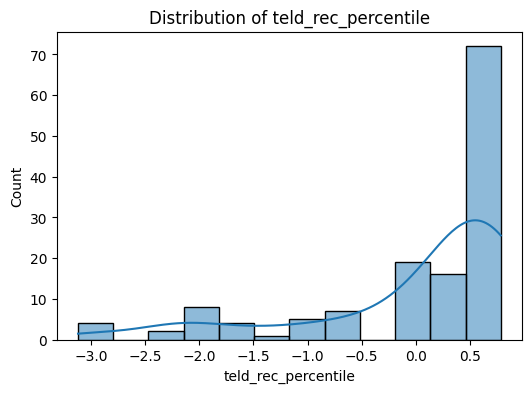

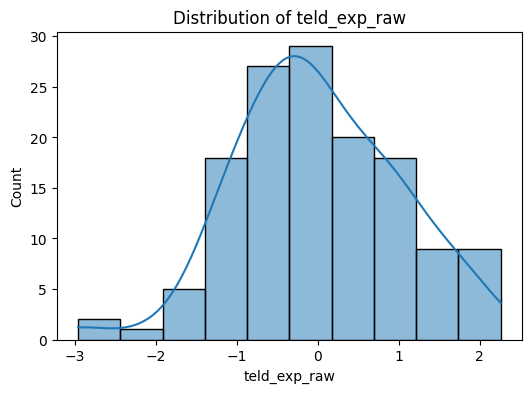

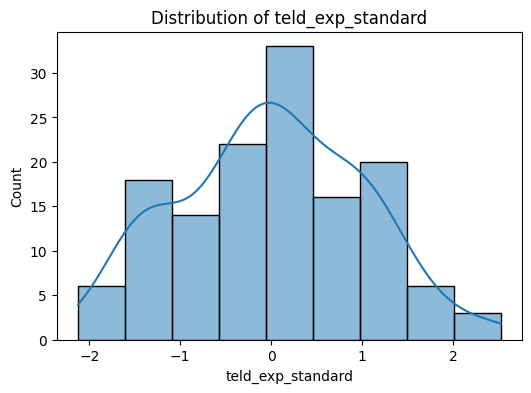

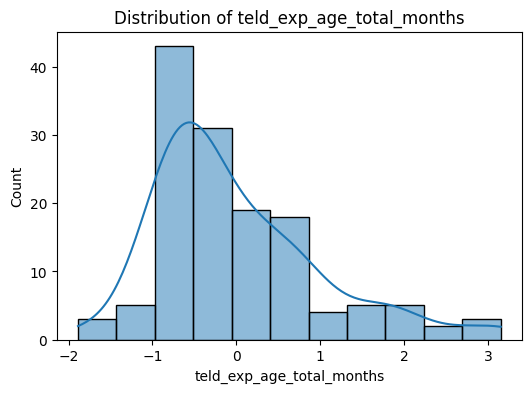

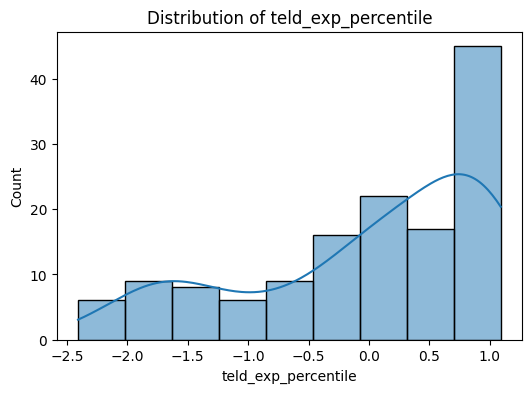

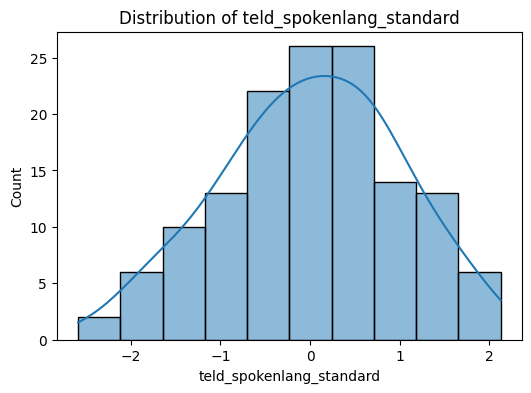

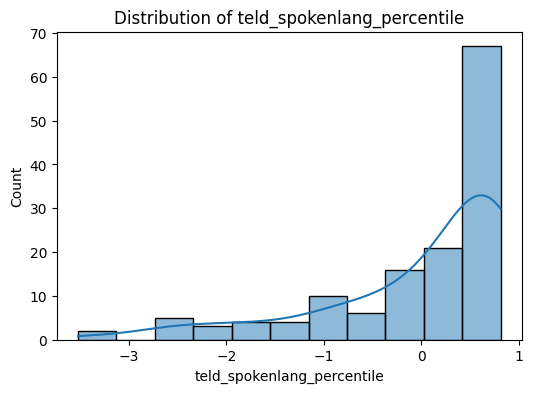

In [ ]:
#Distribution of linguistic variables
for column in linguistic_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

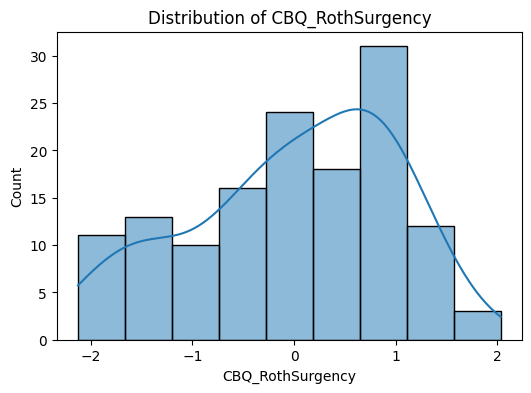

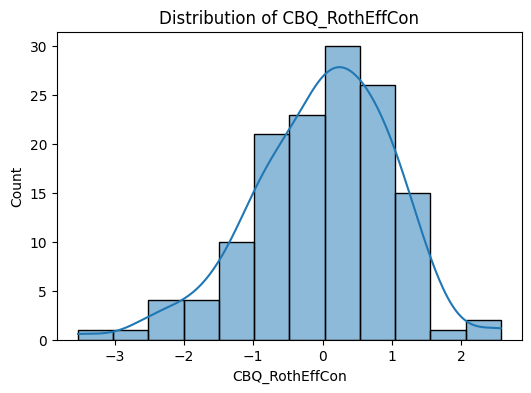

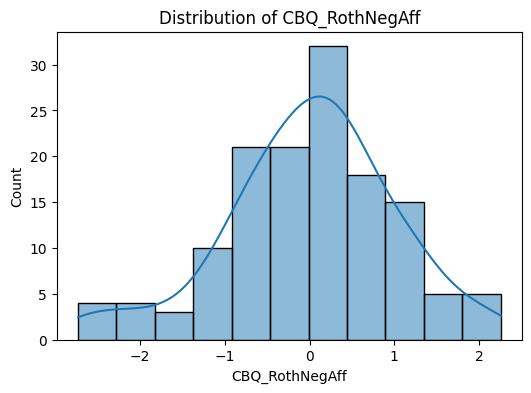

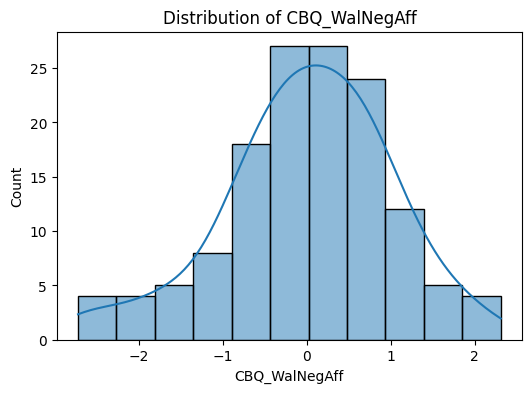

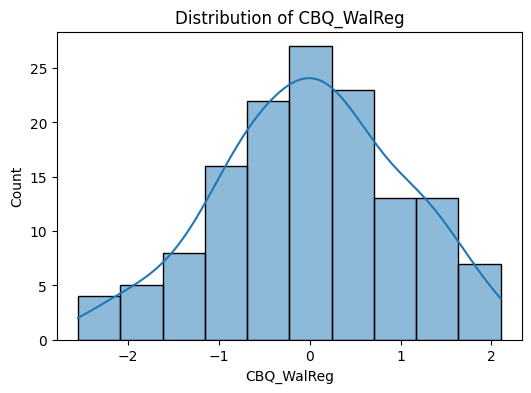

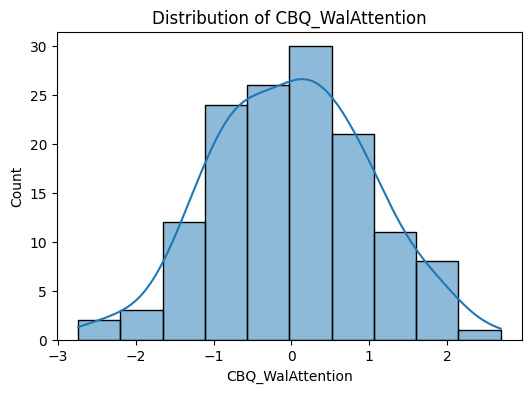

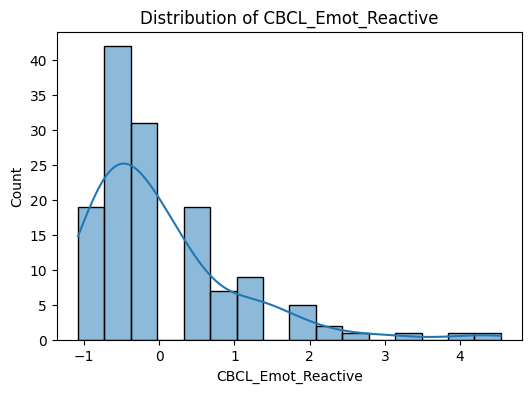

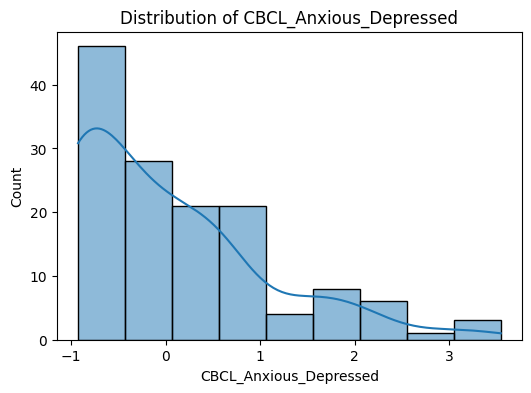

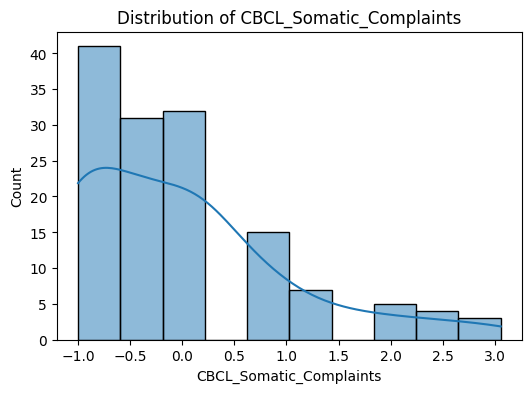

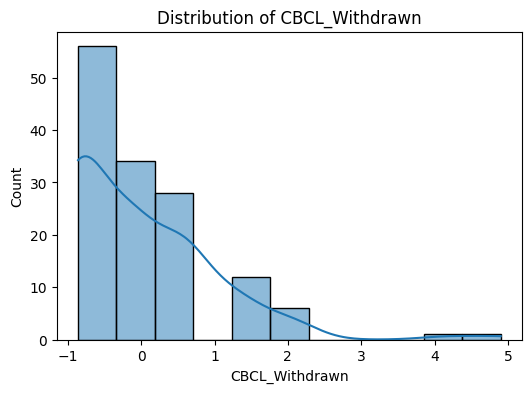

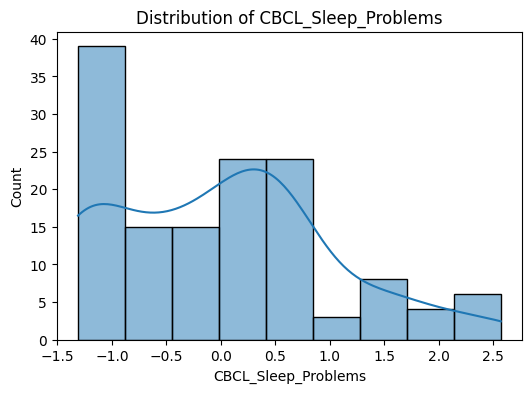

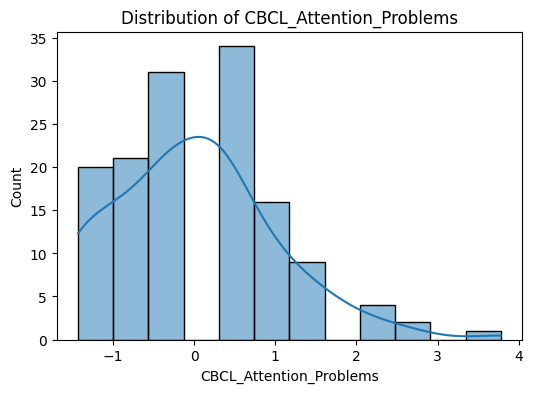

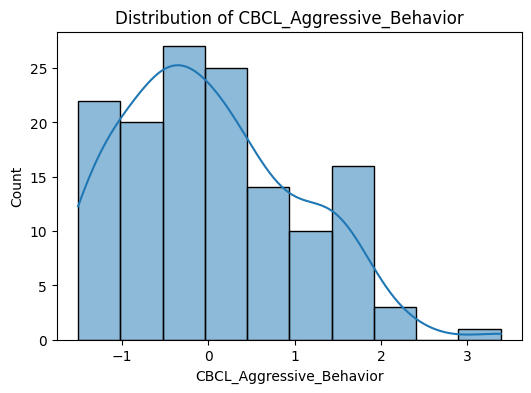

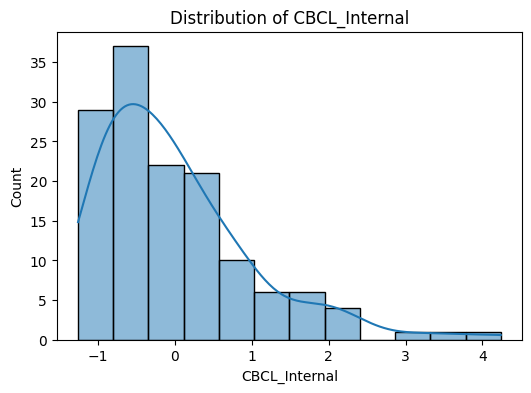

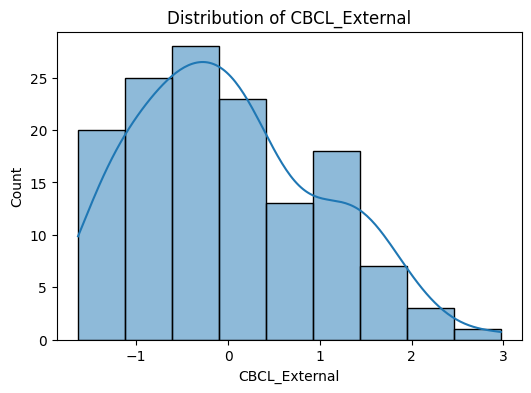

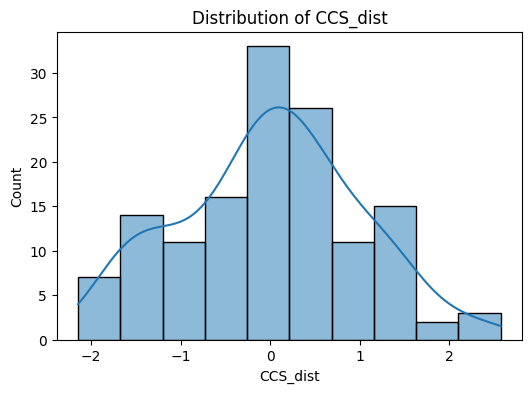

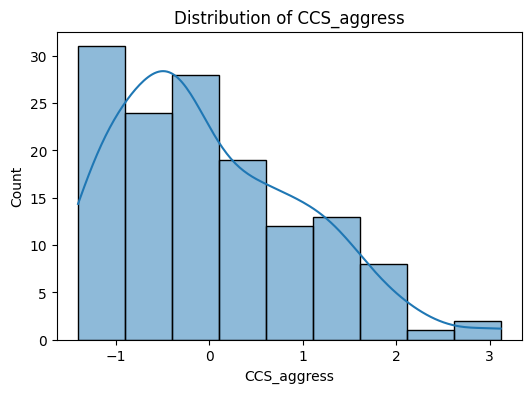

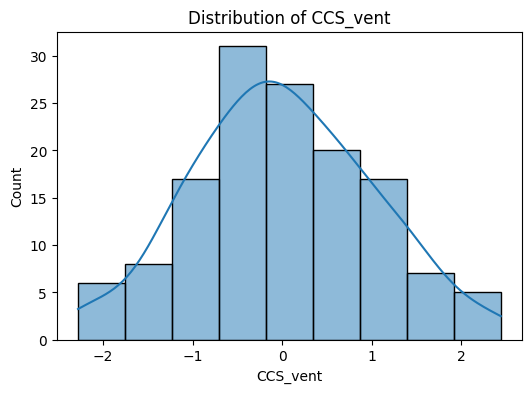

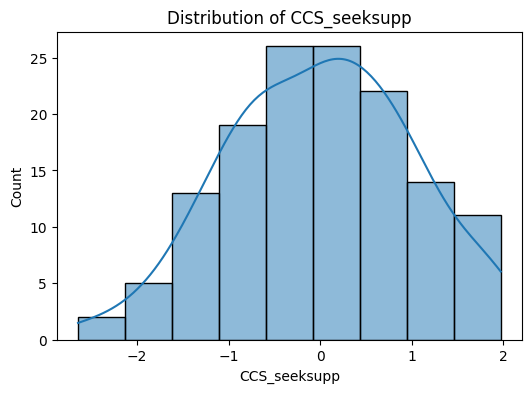

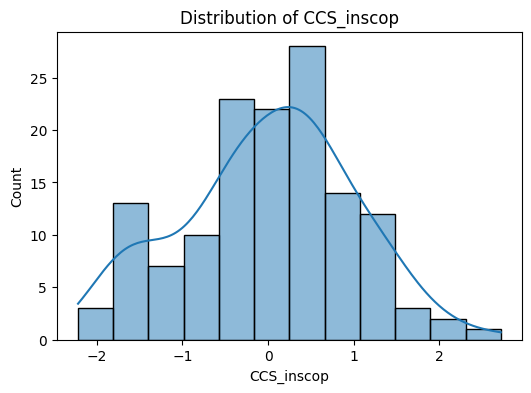

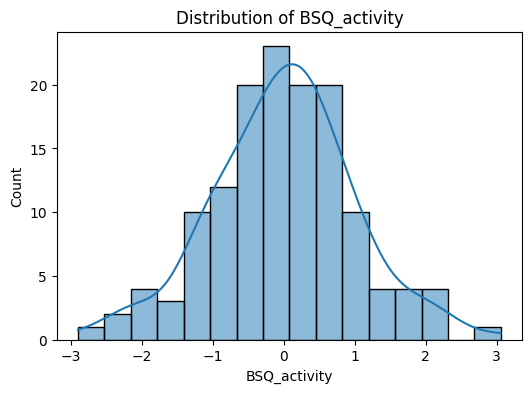

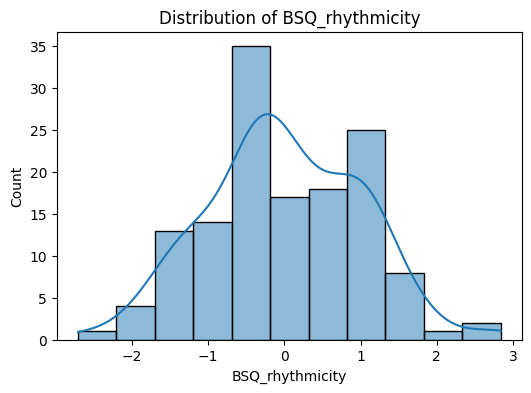

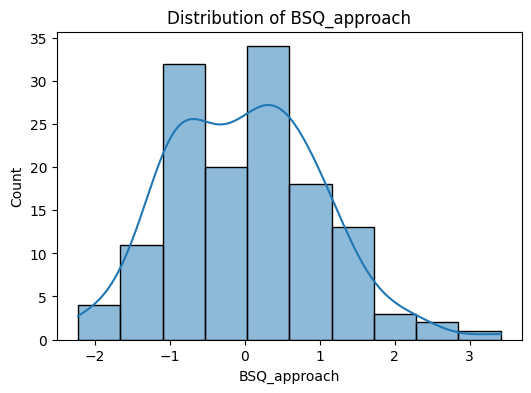

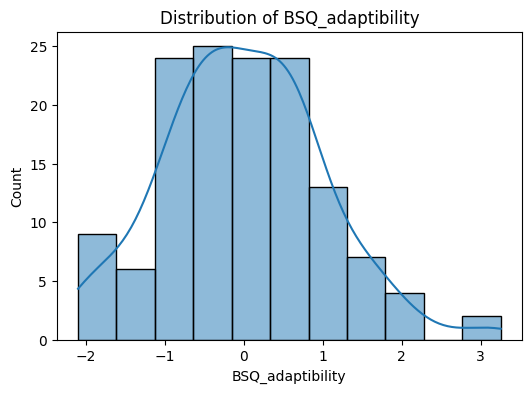

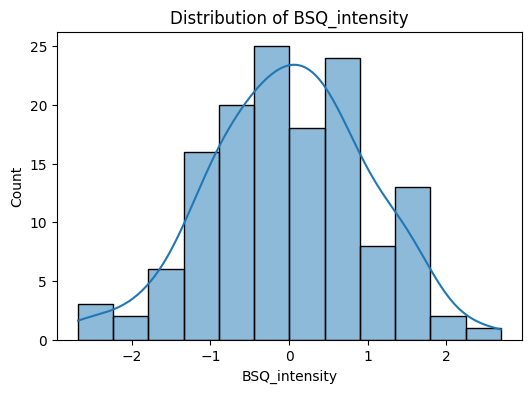

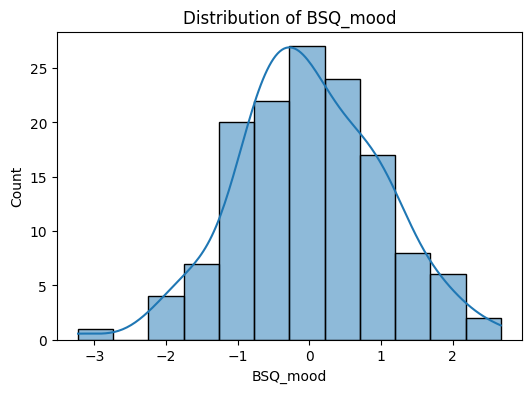

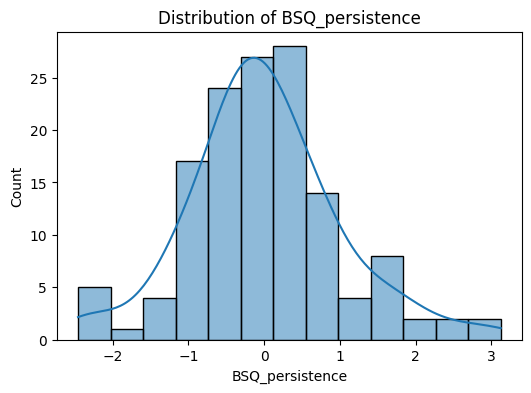

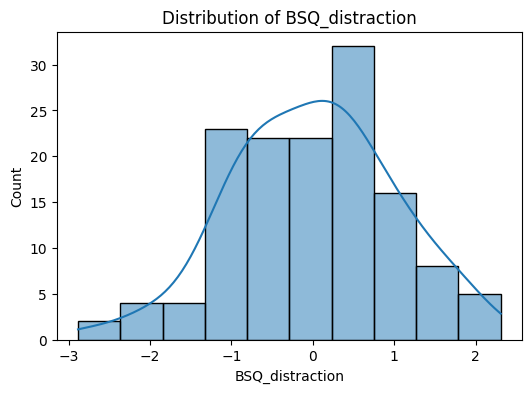

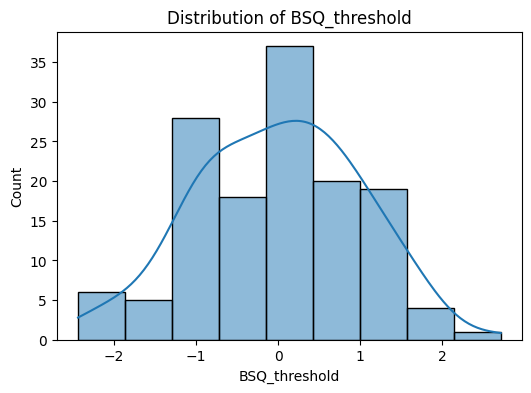

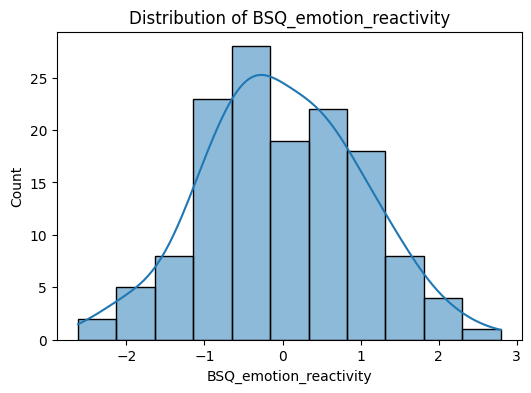

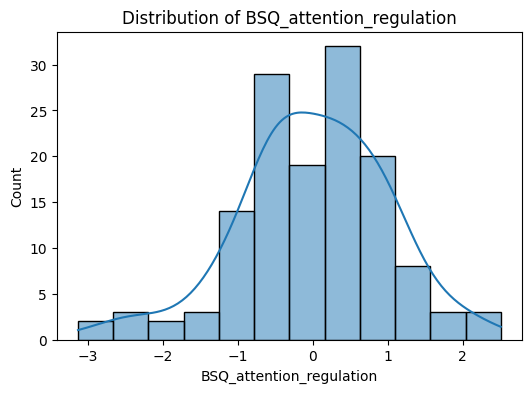

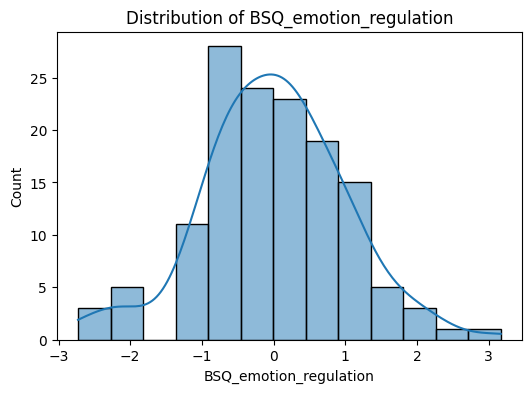

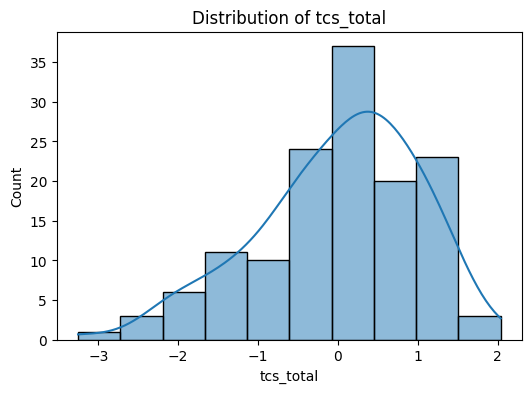

In [ ]:
#Distribution of emotional variables
for column in categorical_columns:
    #Exclude 'ID' from categorical columns list
    if 'ID' in data.columns:
        data_to_plot = data.drop(columns=['ID'])
    else:
        data_to_plot = data

for column in emotional_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

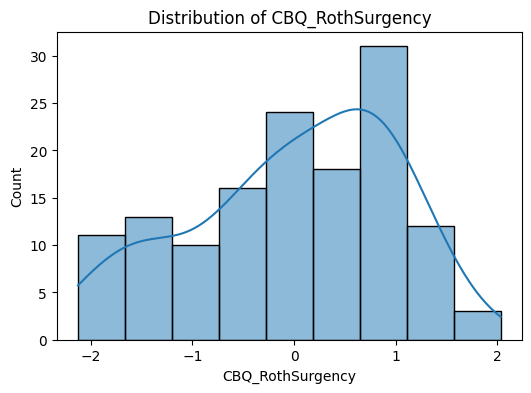

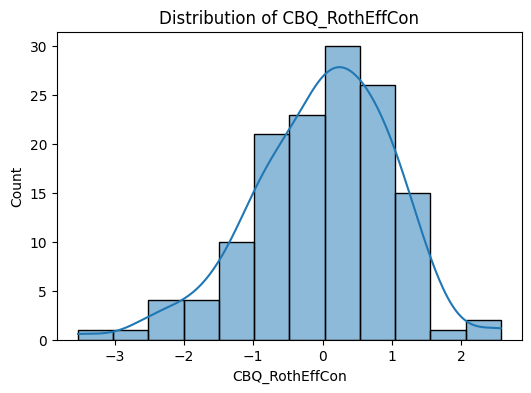

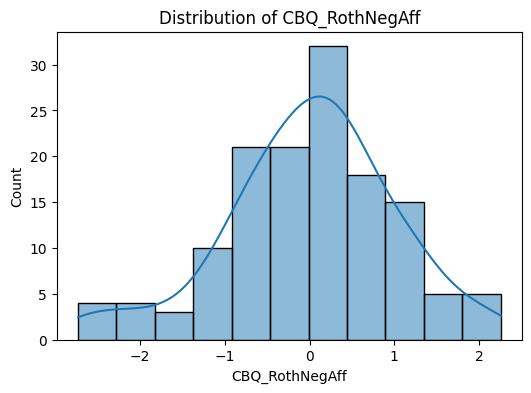

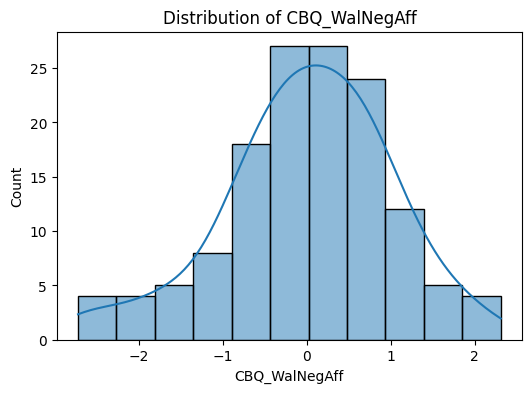

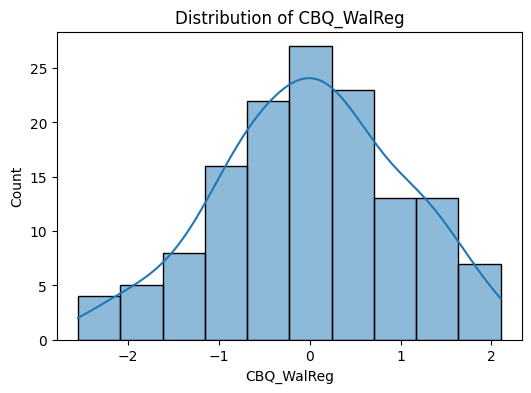

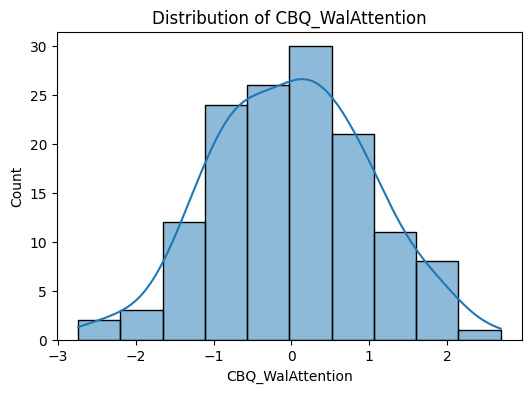

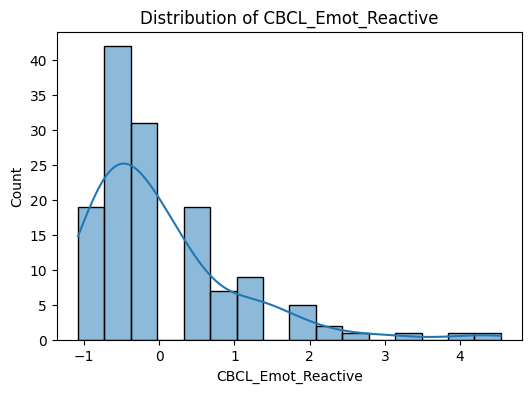

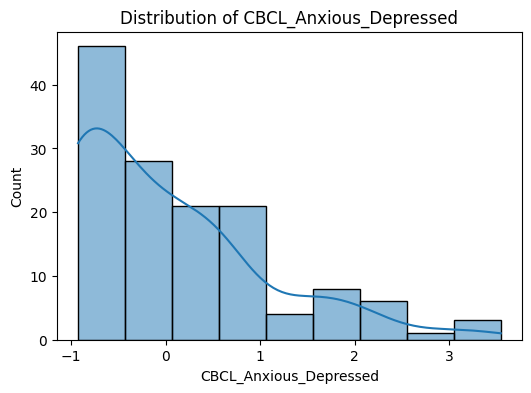

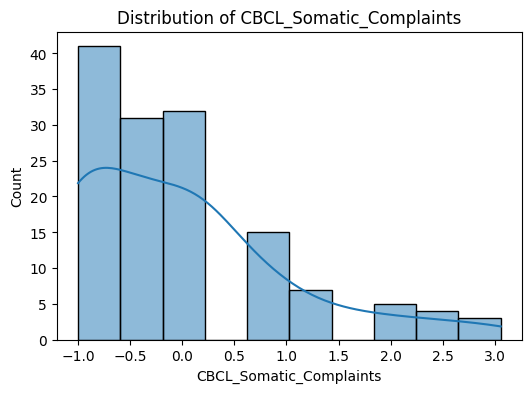

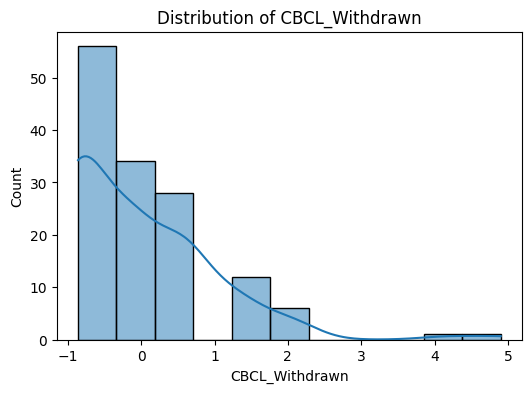

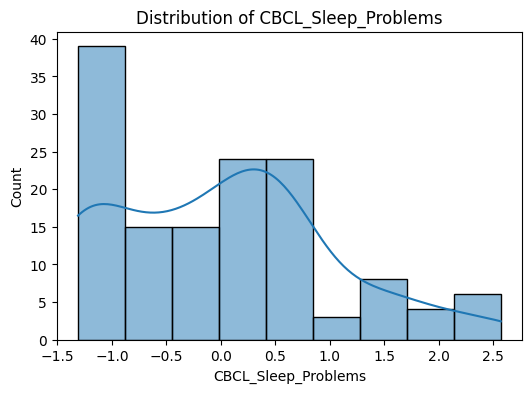

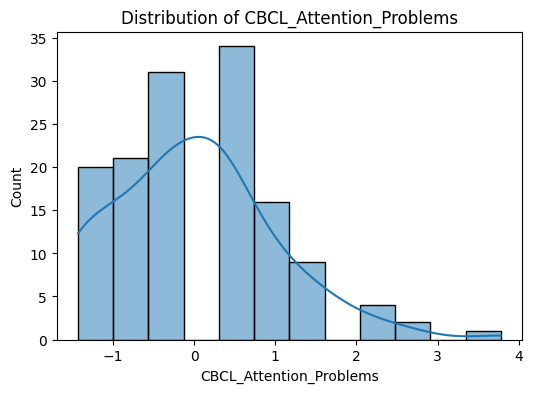

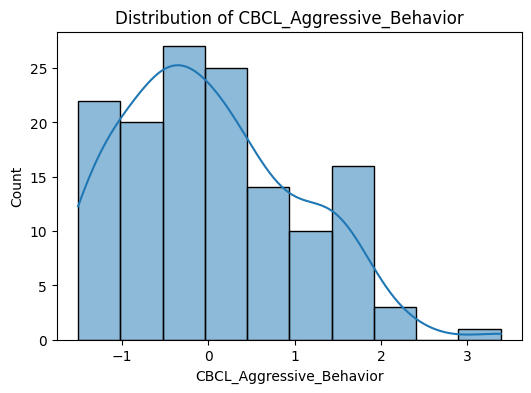

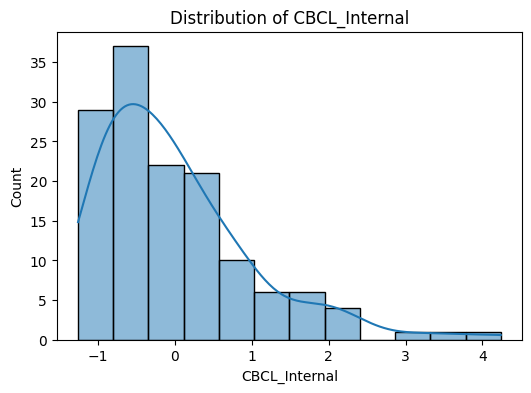

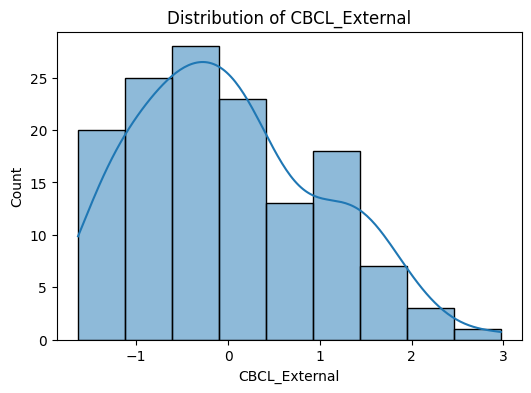

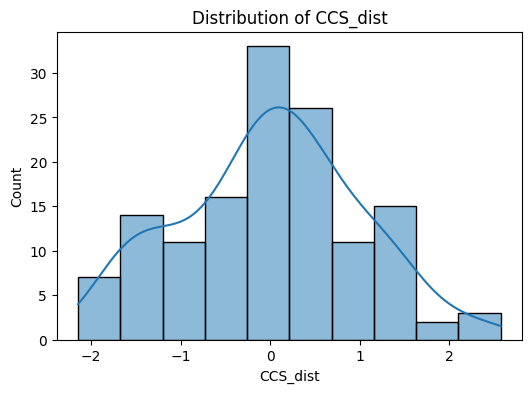

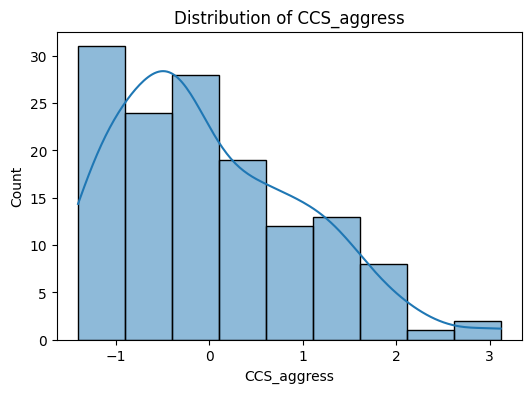

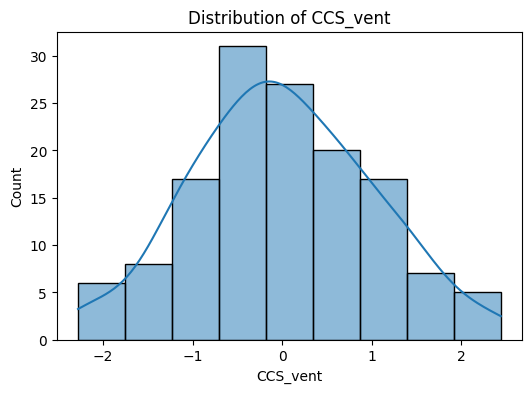

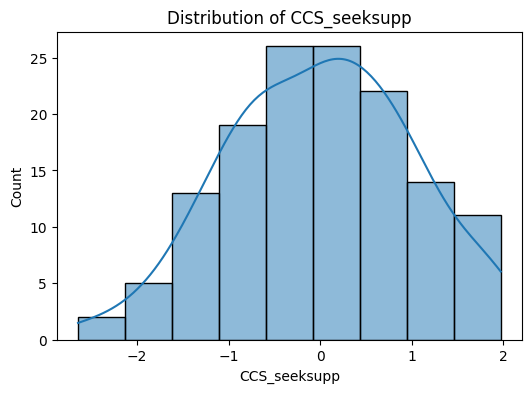

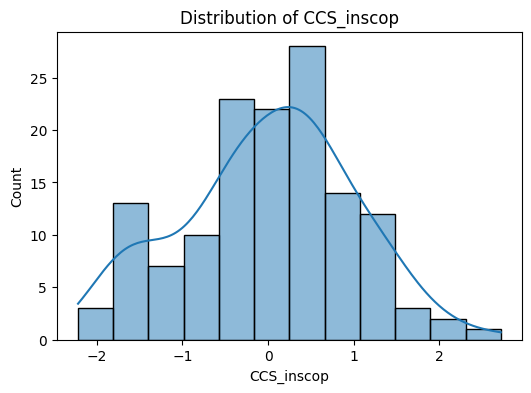

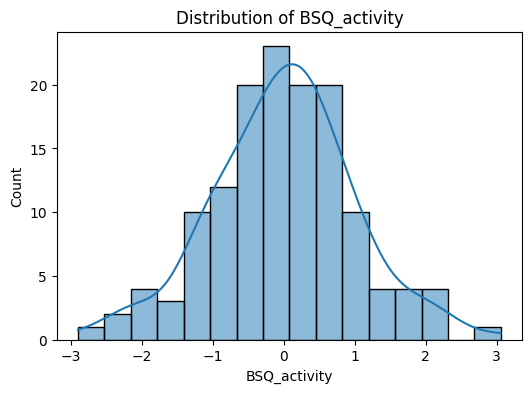

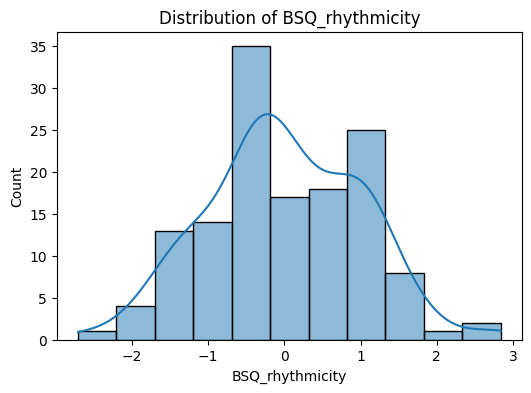

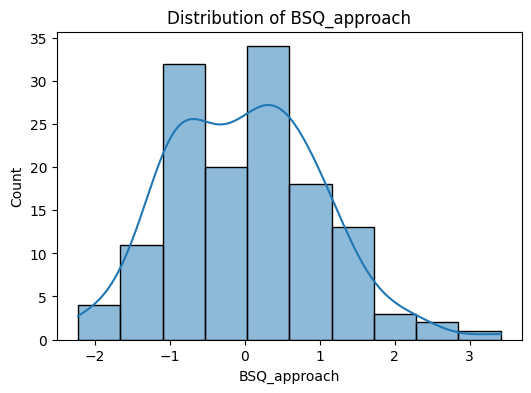

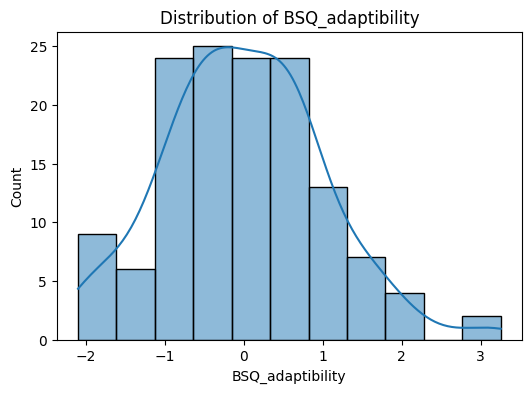

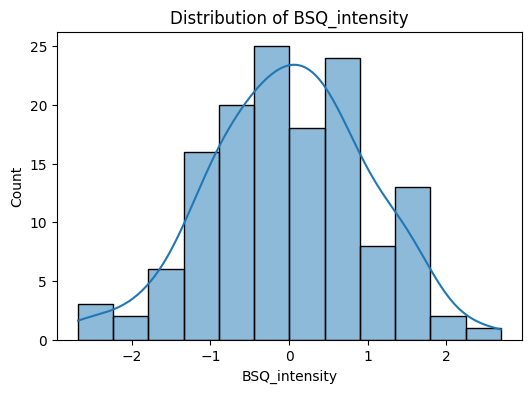

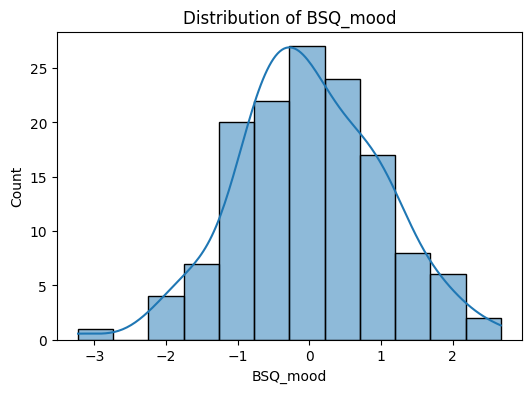

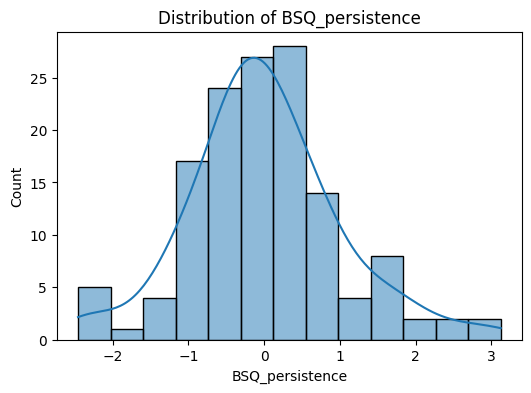

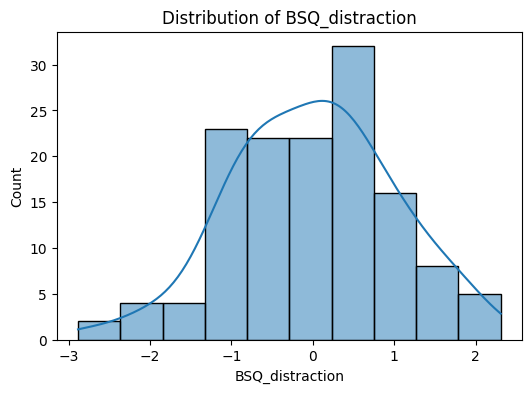

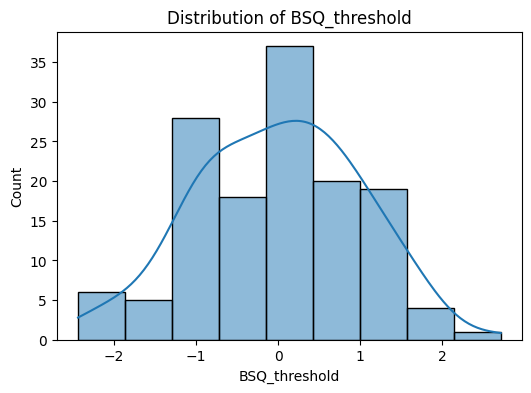

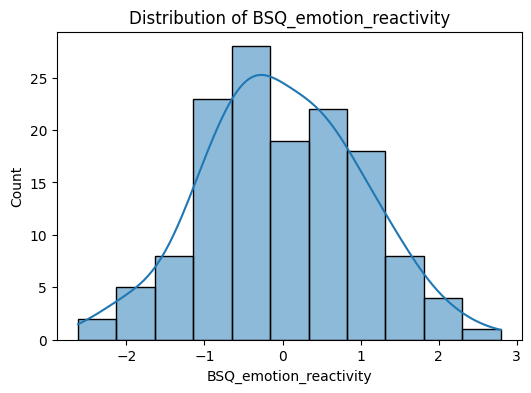

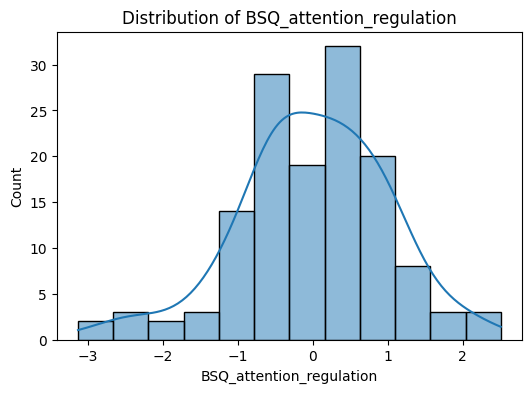

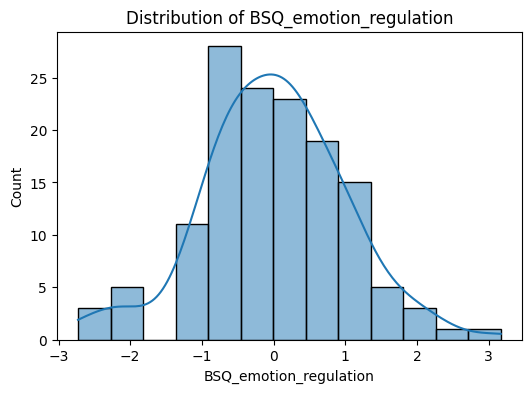

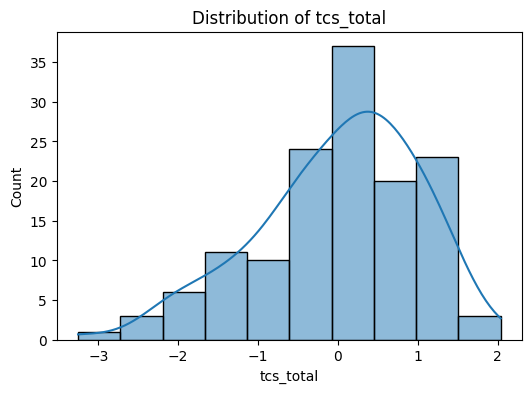

In [ ]:
#Distribution of emotional variables
for column in categorical_columns:
    #Exclude 'ID' from categorical columns list
    if 'ID' in data.columns:
        data_to_plot = data.drop(columns=['ID'])
    else:
        data_to_plot = data

for column in emotional_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

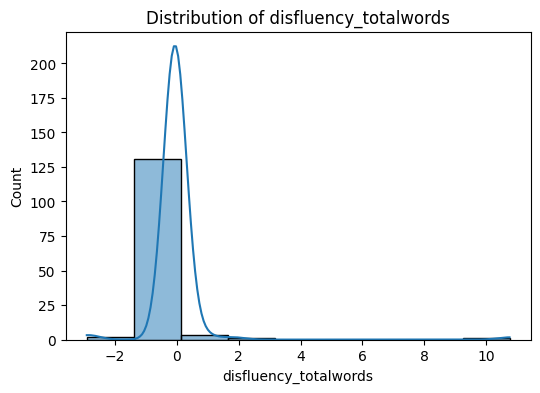

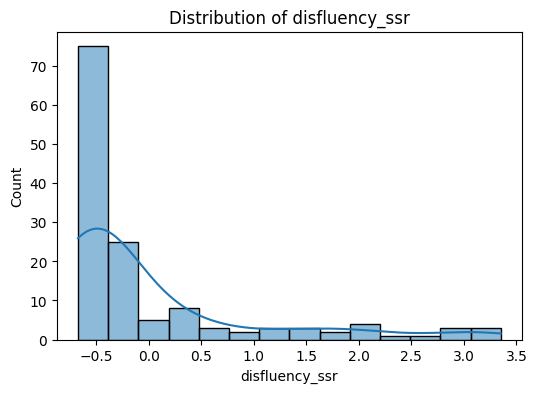

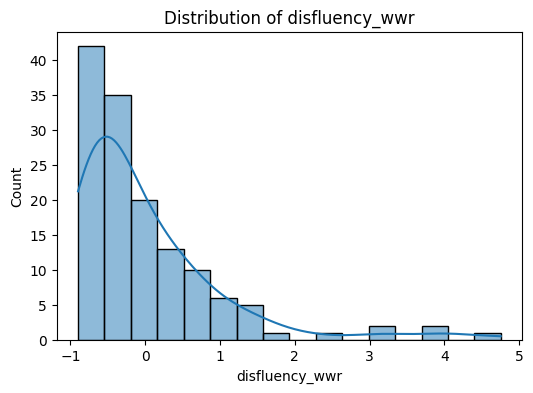

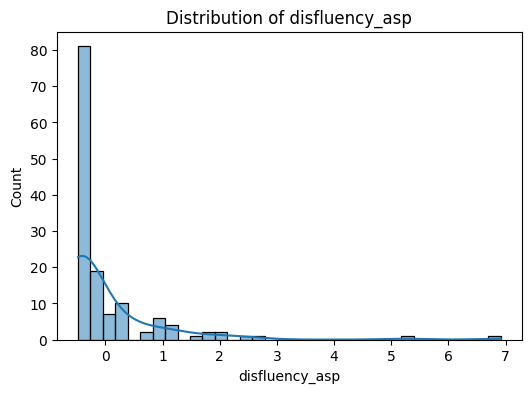

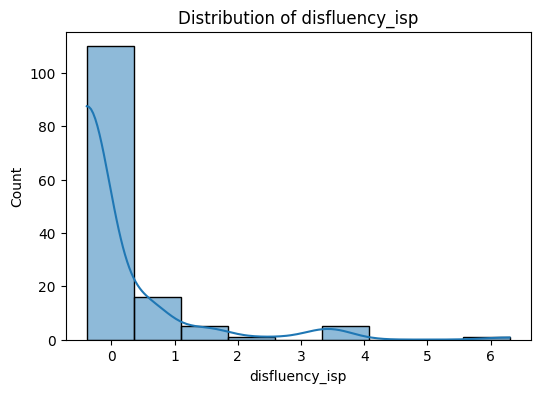

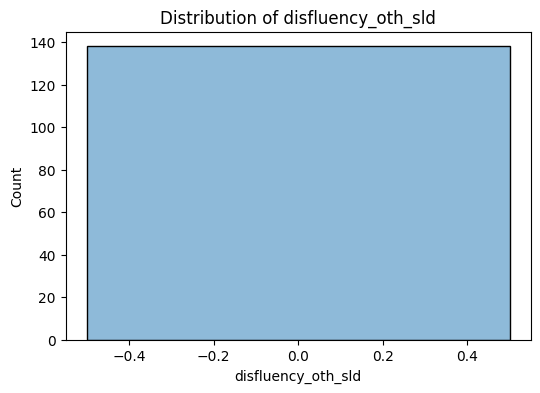

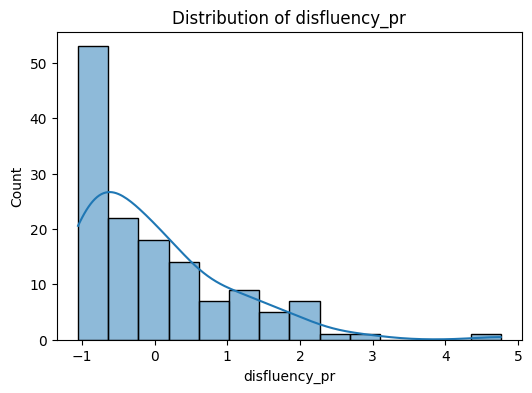

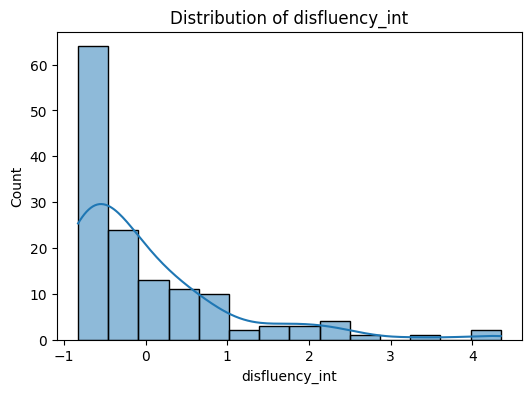

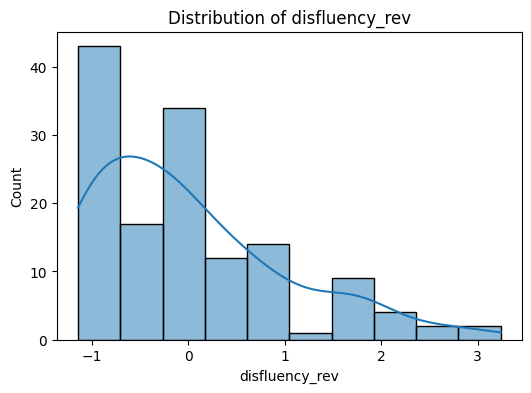

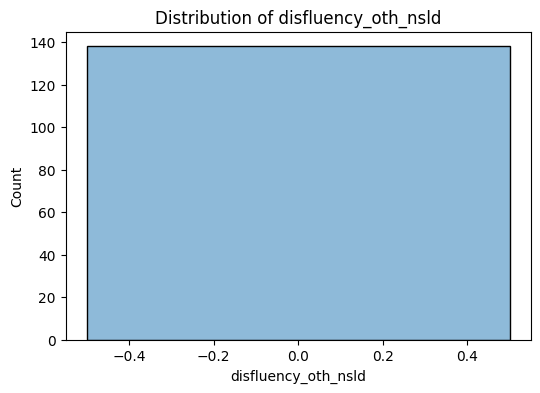

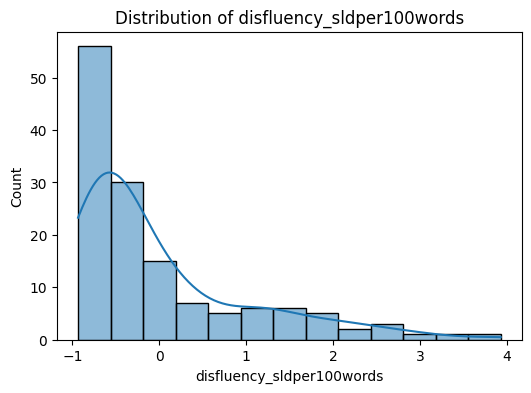

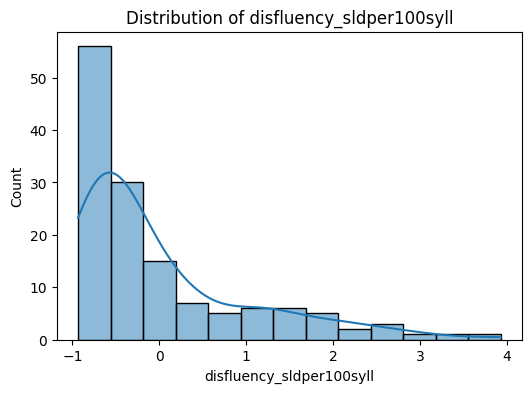

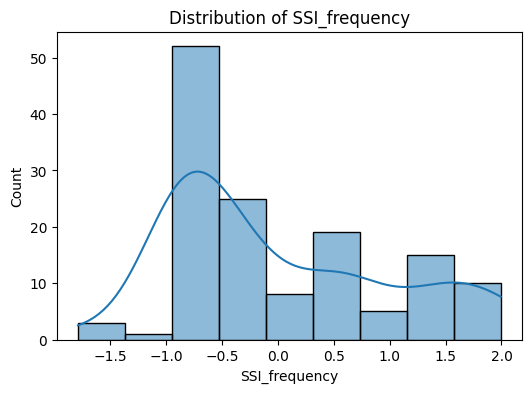

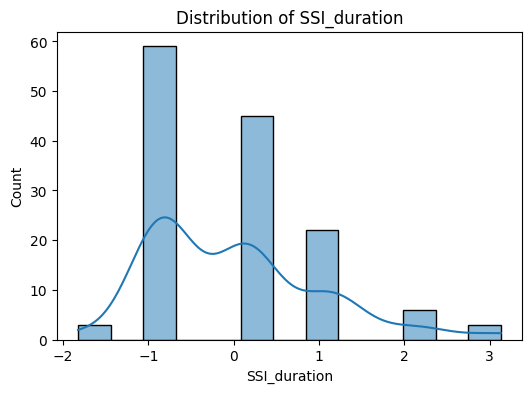

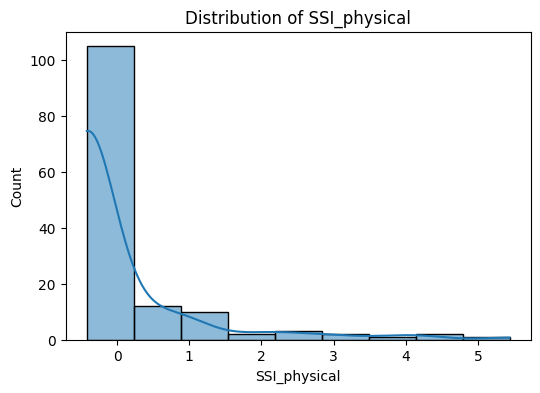

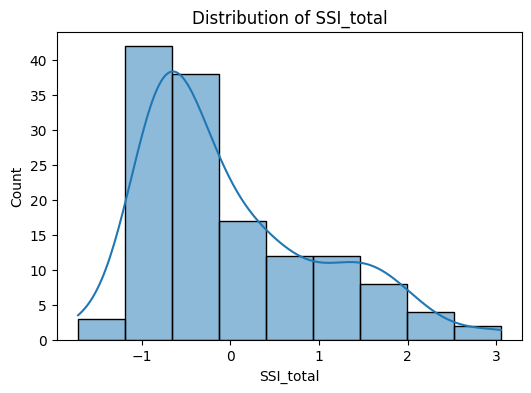

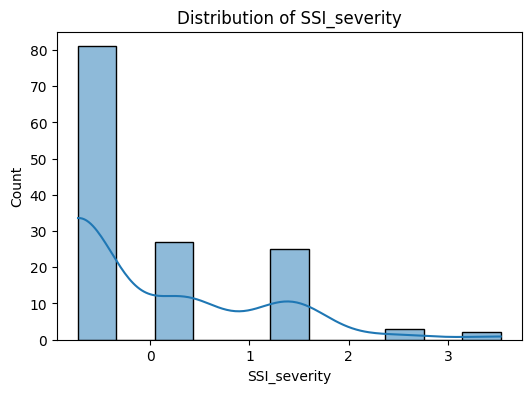

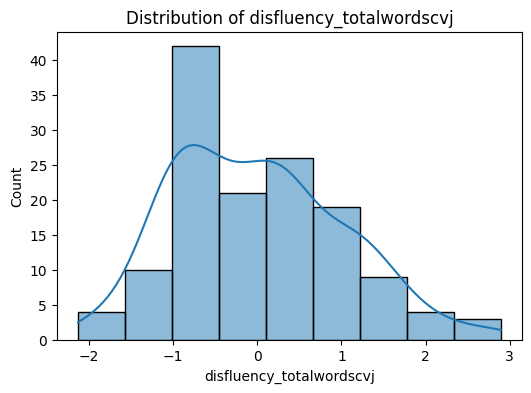

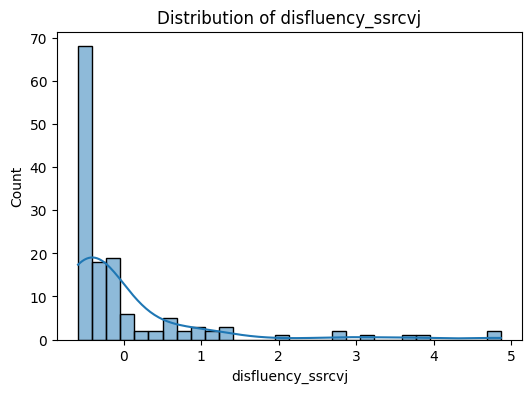

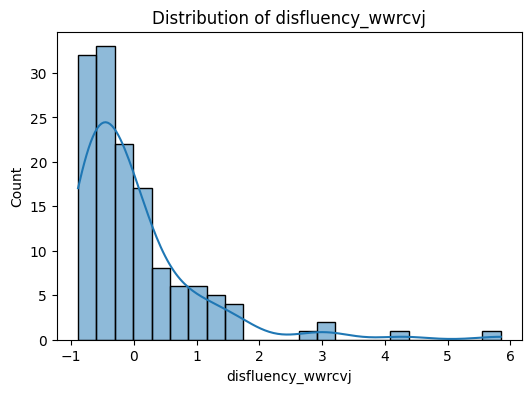

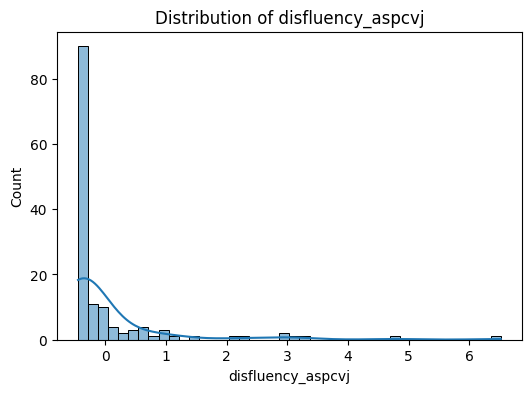

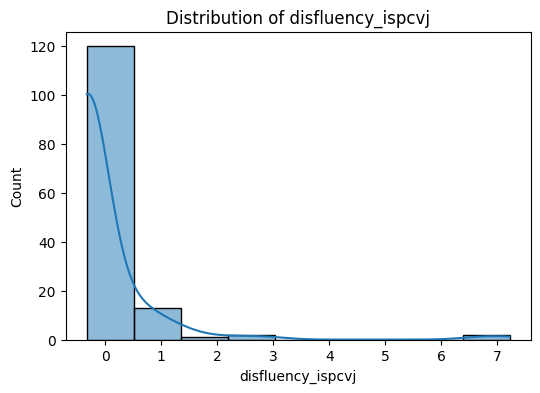

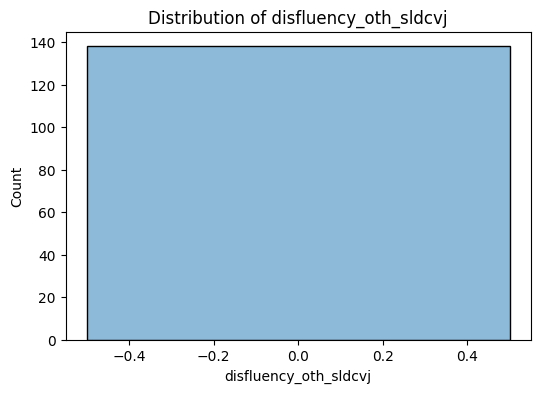

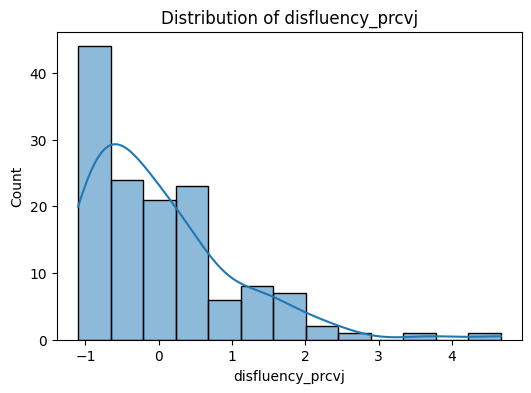

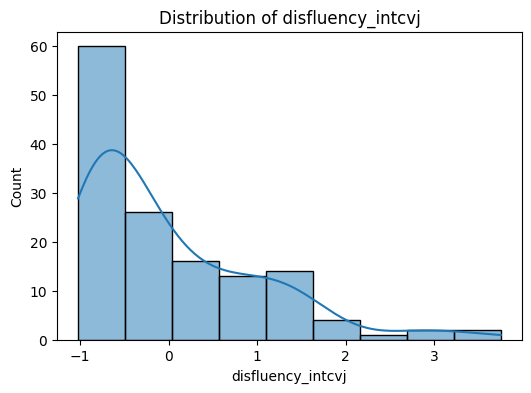

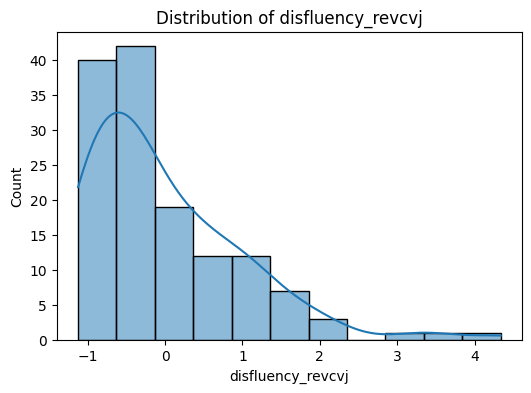

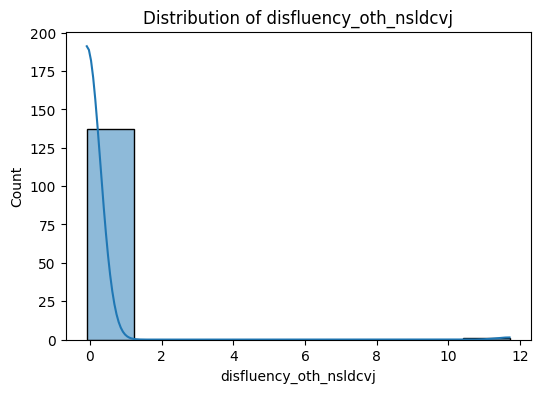

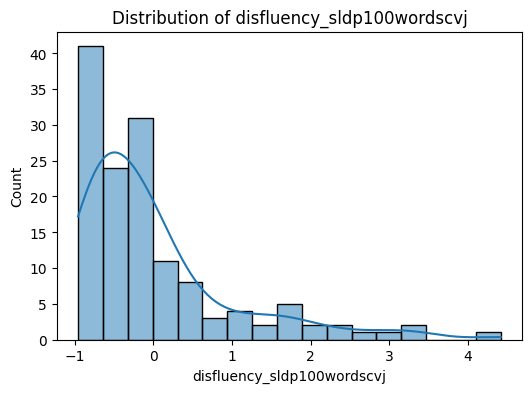

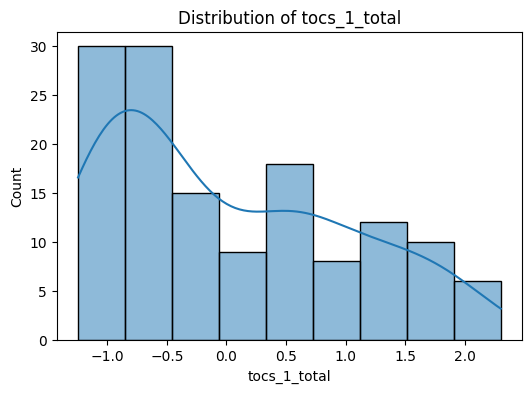

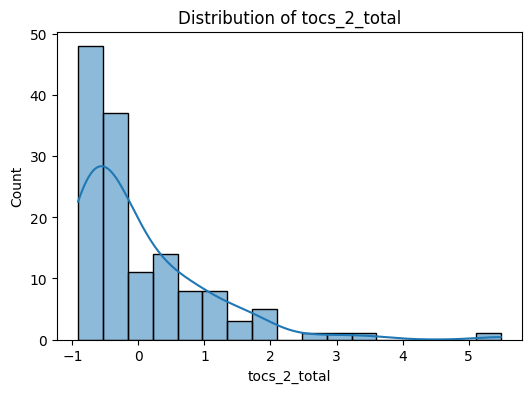

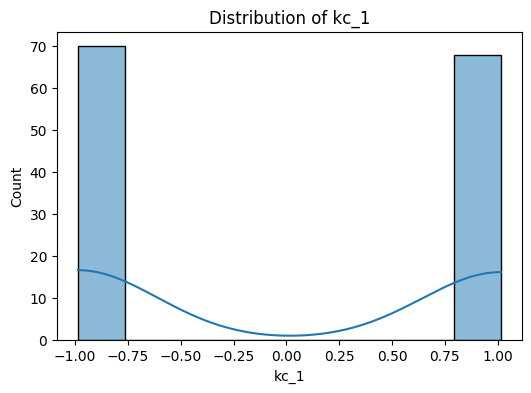

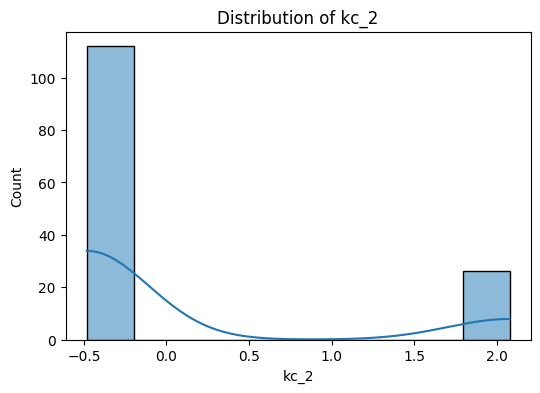

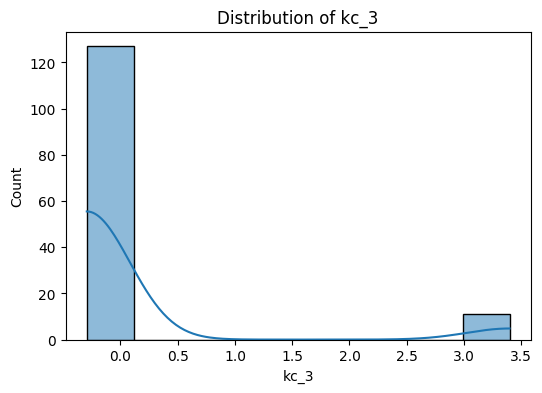

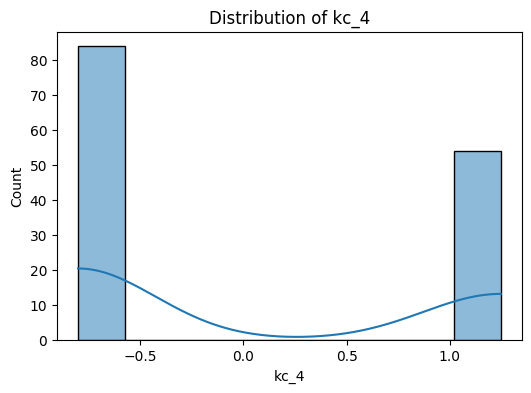

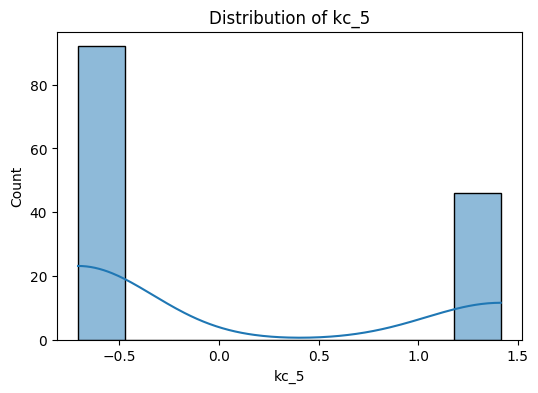

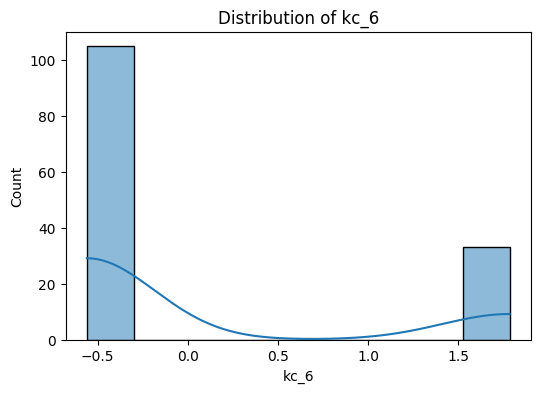

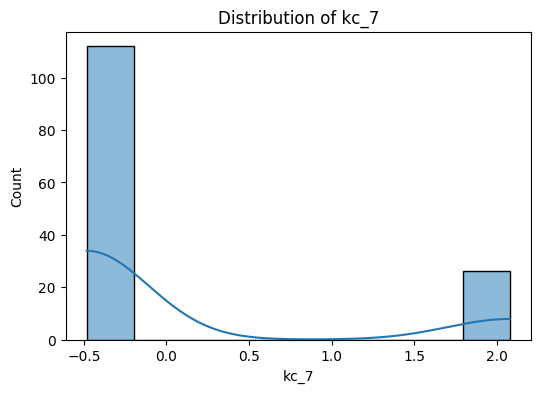

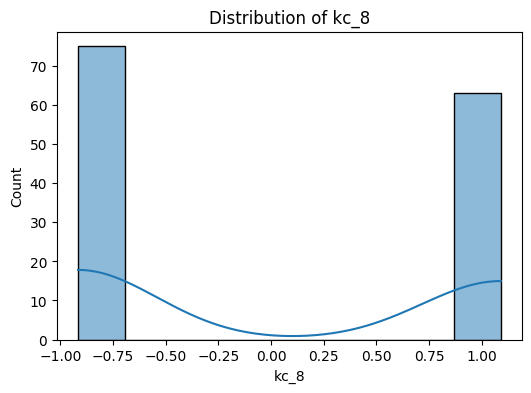

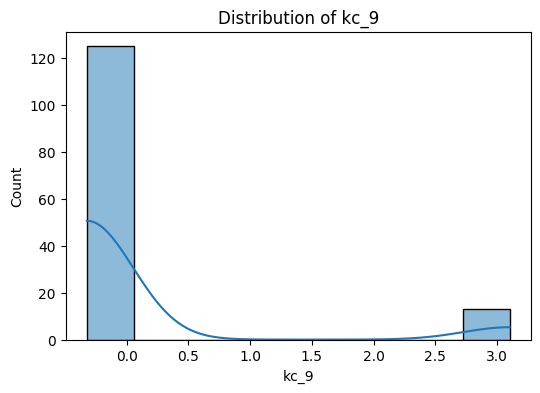

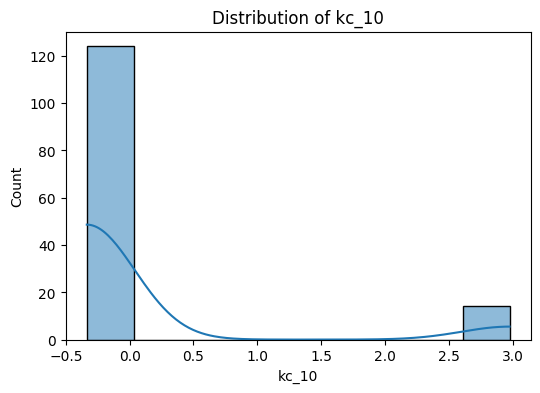

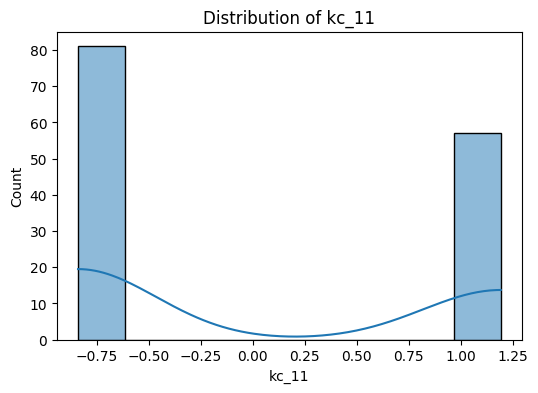

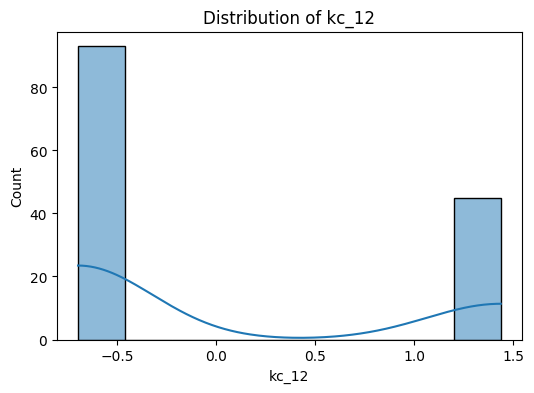

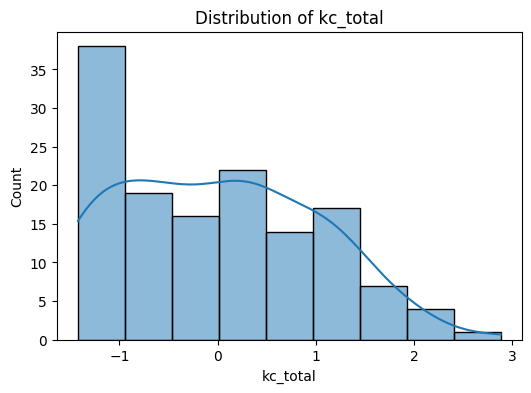

In [ ]:
# Distribution of fluency variables
for column in categorical_columns:
    # Exclude 'ID' from categorical columns list
    if 'ID' in data.columns:
        data_to_plot = data.drop(columns=['ID'])
    else:
        data_to_plot = data

for column in fluency_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

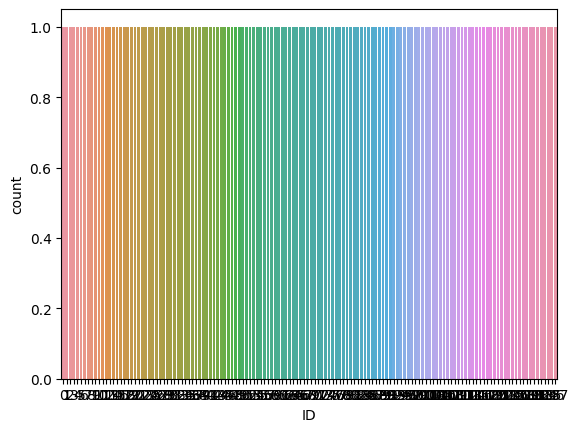

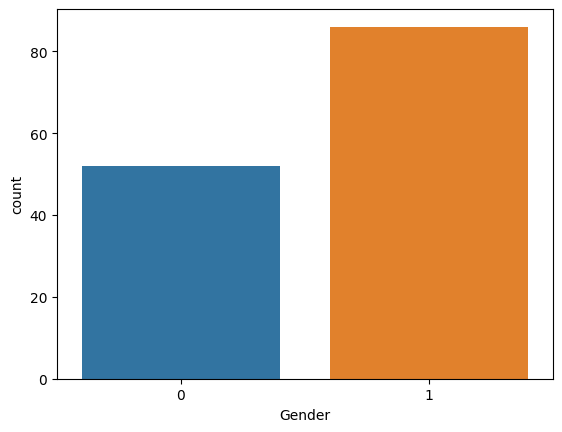

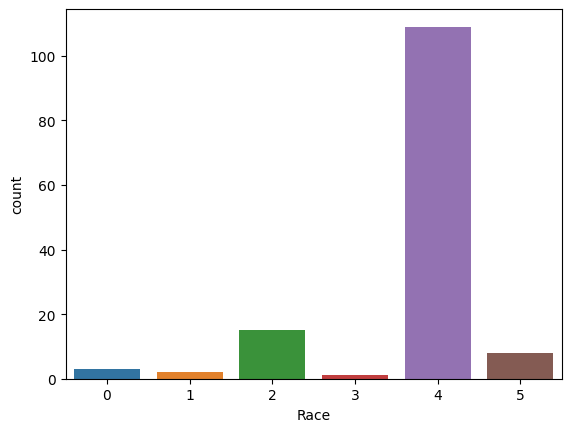

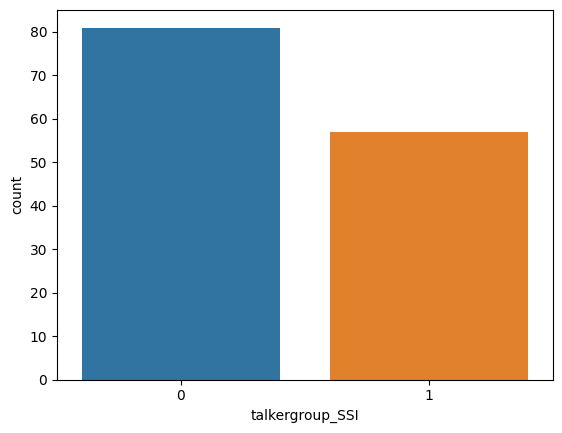

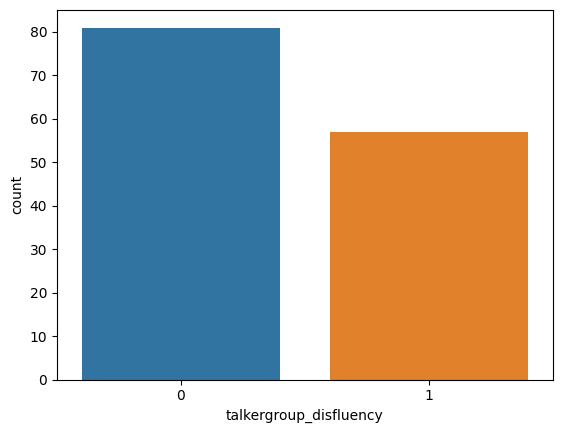

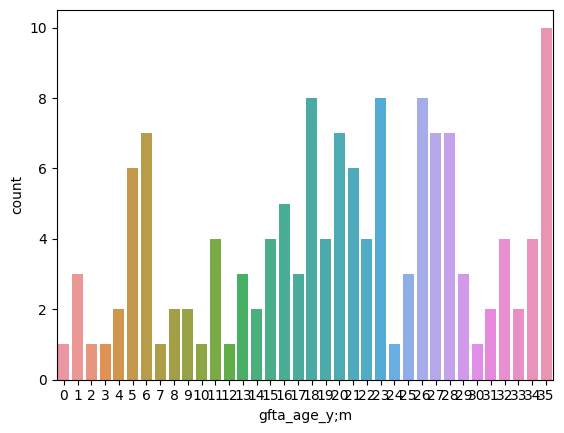

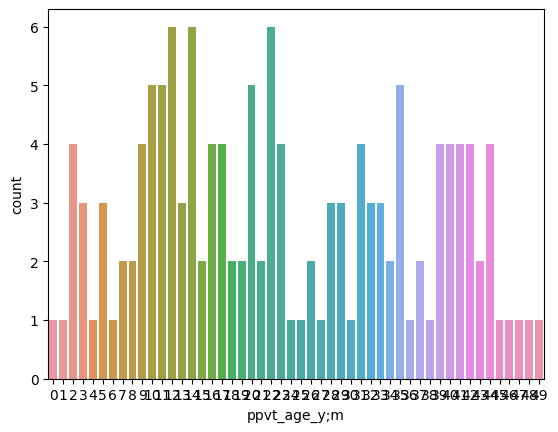

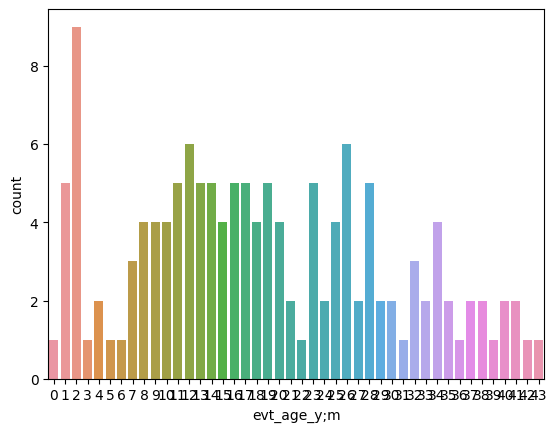

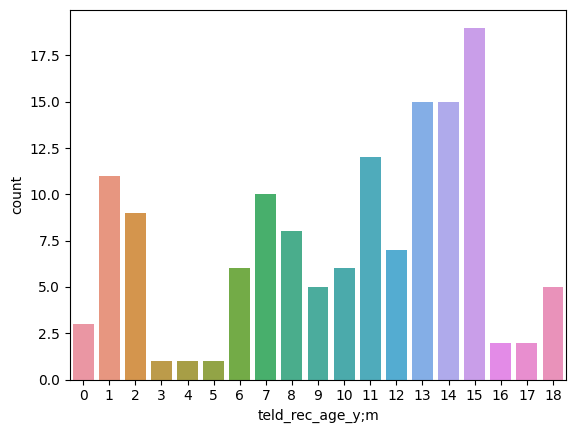

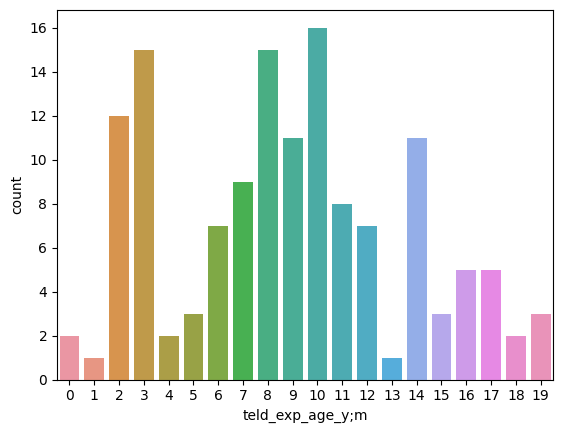

In [ ]:
for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.show()


# Hypothesis Exploration: Differences between children who stutter and children who do not?

In [7]:
from scipy.stats import ttest_ind

stutter = data[data['talkergroup_SSI'] == 1]
no_stutter = data[data['talkergroup_SSI'] == 0]

#Function to conduct t-test between two groups
def t_test(variable1, variable2):
    t_tests, p_value = ttest_ind(variable1, variable2, equal_var=False)
    n1, n2 = len(variable1), len(variable2)
    pooled_var = ((n1 - 1) * np.var(variable1) + (n2 - 1) * np.var(variable2)) / (n1 + n2 - 2)
    cohens_d = (np.mean(variable1) - np.mean(variable2)) / (pooled_var ** 0.5)
    return t_tests, p_value, cohens_d

#Function to print test results for variables
def print_test_results(variable, t_statistic, p_value, effect_size):
    print(f'Test for {variable}:')
    print(f'Test statistic (t): {t_statistic}')
    print(f'p-value: {p_value}')
    print(f'Effect Size (Cohen\'s d): {effect_size}')

In [15]:
def analyze_group(group_label, variables, t_test_results, significant_good, significant_any):
    print(f"\n--- {group_label} Variables ---\n")

    variable_p_values = []

    #Loop through each variable in group
    for variable in variables:
        # Perform t-test
        t_stat, p_value, cohens_d = t_test(stutter[variable], no_stutter[variable])
        t_test_results[variable] = {'t_statistic': t_stat, 'p_value': p_value, 'effect_size': cohens_d}
        variable_p_values.append((variable, p_value))

    #Sort variables by p-value in ascending order
    variable_p_values.sort(key=lambda x: x[1])

    #Print results for each group
    for variable, p_value in variable_p_values:
        print_test_results(variable, t_test_results[variable]["t_statistic"],
                           p_value, t_test_results[variable]["effect_size"])

        #Check if result is significant
        if p_value < 0.05:
            if abs(t_test_results[variable]["effect_size"]) > 0.5:
                print(f'The difference in {variable} between groups is statistically significant with a good effect size.')
                significant_good.append(variable)
            else:
                print(f'The difference in {variable} between groups is statistically significant but has a small effect size.')
                significant_any.append(variable)
        else:
            print(f'The difference in {variable} between groups is not statistically significant.')
        print('\n')

In [9]:
#Function to print significant variables
def print_significant_variables(significant_good, significant_any):
    print("Significant variables with a good effect size:")
    print(significant_good)

    print("Significant variables but not necessarily with a good effect size:")
    print(significant_any)

In [14]:
#Print in a table
from tabulate import tabulate

def print_significant_variables_table(significant_variables, t_test_results):
    table_data = []

    for variable in significant_variables:
        t_statistic = t_test_results[variable]["t_statistic"]
        p_value = t_test_results[variable]["p_value"]
        effect_size = t_test_results[variable]["effect_size"]

        table_data.append([variable, t_statistic, p_value, effect_size])

    headers = ["Variable", "Test Statistic", "P-value", "Cohen's d"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

In [13]:
#Main function
def main():
    t_test_results = {}
    significant_good = []
    significant_any = []
    table_data_good = []
    table_data_any = []

    #Define variable groups
    variable_groups = [linguistic_variables, emotional_variables, fluency_variables, demographic_variables]

    #Loop through each variable group
    for group_label, variables in zip(['Linguistic', 'Emotional', 'Fluency', 'Demographic'], variable_groups):
        analyze_group(group_label, variables, t_test_results, significant_good, significant_any)

    print("\nSignificant variables with a good effect size:")
    print_significant_variables_table(significant_good, t_test_results)

    print("\nSignificant variables but not necessarily with a good effect size:")
    print_significant_variables_table(significant_any, t_test_results)

#Main function only called when script executed
if __name__ == "__main__":
    main()


--- Linguistic Variables ---

Test for evt_raw:
Test statistic (t): -4.531043784507057
p-value: 1.2785891587817117e-05
Effect Size (Cohen's d): -0.7531839263242549
The difference in evt_raw between groups is statistically significant with a good effect size.


Test for evt_age_total_months:
Test statistic (t): -3.601270880345021
p-value: 0.00045522289447723894
Effect Size (Cohen's d): -0.6206094463214449
The difference in evt_age_total_months between groups is statistically significant with a good effect size.


Test for teld_rec_age_total_months:
Test statistic (t): -2.395259923043487
p-value: 0.018032137589851154
Effect Size (Cohen's d): -0.4067066205881277
The difference in teld_rec_age_total_months between groups is statistically significant but has a small effect size.


Test for teld_exp_raw:
Test statistic (t): -2.2840417550845267
p-value: 0.02418390388970464
Effect Size (Cohen's d): -0.40180690199431773
The difference in teld_exp_raw between groups is statistically significant

<ipython-input-7-6db3a33f7208>:11: RuntimeWarning: invalid value encountered in double_scalars
  cohens_d = (np.mean(variable1) - np.mean(variable2)) / (pooled_var ** 0.5)


In [34]:
number_of_items_good = len(significant_good)
print(number_of_items_good)

23


In [35]:
number_of_items_any = len(significant_any)
print(number_of_items_any)

11


# ML

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

stutter = data[data['talkergroup_SSI'] == 1]
no_stutter = data[data['talkergroup_SSI'] == 0]

linguistic_features = linguistic_variables
emotional_features = emotional_variables
fluency_features = fluency_variables
demographic_features = demographic_variables

feature_groups = [
    linguistic_features,
    emotional_features,
    fluency_features,
    demographic_features,
]

selected_features = []

#Separate by participant for train and test sets
participants = data['ID'].unique()
train_participants, test_participants = train_test_split(participants, test_size=0.3, random_state=42)

train_data = data[data['ID'].isin(train_participants)]
test_data = data[data['ID'].isin(test_participants)]

target = 'talkergroup_SSI'

alphas_to_test = np.logspace(-3, 3, 10)

In [17]:
#Loop through each features group
for features in feature_groups:

    #Training and test data
    X_train, y_train = train_data[features], train_data[target]
    X_test, y_test = test_data[features], test_data[target]

    #Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Best alpha
    best_alpha = None
    best_score = 0

    #Test different alpha values
    for alpha in alphas_to_test:
        # Fit the Ridge model
        ridge_model = Ridge(alpha=alpha).fit(X_train_scaled, y_train)

        #Make predictions and calculate accuracy
        y_pred = np.round(ridge_model.predict(X_test_scaled))
        accuracy = accuracy_score(y_test, y_pred)

        #Check if alpha gives a better accuracy
        if accuracy > best_score:
            best_score = accuracy
            best_alpha = alpha

    #Train final Ridge model on entire training set
    final_ridge_model = Ridge(alpha=best_alpha).fit(X_train_scaled, y_train)

    #Make predictions on test set
    y_pred = np.round(final_ridge_model.predict(X_test_scaled))

    #Evaluate final model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)


    print(f'\nFeatures: {features}')
    print(f'Best alpha value: {best_alpha}')
    print('Selected Features:')
    print(features)
    print('\nFinal Model Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

    selected_features.extend(features)

print('Selected Features:')
print(selected_features)


Features: ['gfta_raw', 'gfta_standard', 'gfta_percentile', 'gfta_age_total_months', 'ppvt_standard', 'ppvt_percentile', 'ppvt_stanine', 'ppvt_age_total_months', 'evt_raw', 'evt_standard', 'evt_percentile', 'evt_stanine', 'evt_age_total_months', 'teld_rec_raw', 'teld_rec_standard', 'teld_rec_age_total_months', 'teld_rec_percentile', 'teld_exp_raw', 'teld_exp_standard', 'teld_exp_age_total_months', 'teld_exp_percentile', 'teld_spokenlang_standard', 'teld_spokenlang_percentile']
Best alpha value: 0.001
Selected Features:
['gfta_raw', 'gfta_standard', 'gfta_percentile', 'gfta_age_total_months', 'ppvt_standard', 'ppvt_percentile', 'ppvt_stanine', 'ppvt_age_total_months', 'evt_raw', 'evt_standard', 'evt_percentile', 'evt_stanine', 'evt_age_total_months', 'teld_rec_raw', 'teld_rec_standard', 'teld_rec_age_total_months', 'teld_rec_percentile', 'teld_exp_raw', 'teld_exp_standard', 'teld_exp_age_total_months', 'teld_exp_percentile', 'teld_spokenlang_standard', 'teld_spokenlang_percentile']

Fin

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

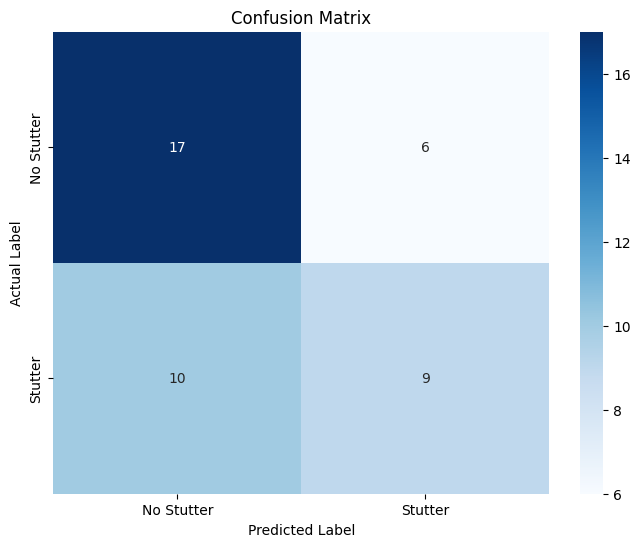

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = final_ridge_model.predict(X_test_scaled)

#Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, np.round(y_pred))

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stutter', 'Stutter'], yticklabels=['No Stutter', 'Stutter'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
print(confusion_matrix)

[[17  6]
 [10  9]]


*   True Positive (TP): 6
*   True Negative (TN): 12
*   False Positive (FP): 3
*   False Negative (FN): 7







## Feature Importance

In [19]:
#List to store selected features with coefficients
selected_features_with_coefficients = []

#Loop through variable groups
for features in feature_groups:
    # Prepare training and test data
    X_train, y_train = train_data[features], train_data[target]
    X_test, y_test = test_data[features], test_data[target]

    #Standardize variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Train Ridge model with best alpha
    final_ridge_model = Ridge(alpha=best_alpha)
    final_ridge_model.fit(X_train_scaled, y_train)

    #Feature coefficients
    coefficients = final_ridge_model.coef_

    #Pair features with coefficients
    feature_coefficients = list(zip(features, coefficients))

    #Sort features by absolute value of coefficient in descending order
    sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

    #Append sorted features to list
    selected_features_with_coefficients.extend(sorted_features)

print('\nSelected Features and Coefficients:')
for feature, coefficient in selected_features_with_coefficients:
    print(f'{feature}: {coefficient:.4f}')


Selected Features and Coefficients:
gfta_standard: 1.1704
gfta_raw: 0.8657
teld_spokenlang_standard: -0.7455
teld_exp_standard: 0.7290
teld_rec_standard: 0.5027
evt_standard: -0.4567
teld_rec_raw: 0.3446
teld_rec_age_total_months: -0.3372
evt_raw: 0.2948
gfta_age_total_months: -0.2346
evt_age_total_months: 0.2077
teld_exp_percentile: -0.2060
ppvt_age_total_months: 0.2023
evt_percentile: -0.1634
ppvt_percentile: 0.1246
teld_rec_percentile: -0.1196
evt_stanine: 0.1021
ppvt_standard: -0.0794
ppvt_stanine: -0.0665
gfta_percentile: -0.0551
teld_exp_raw: -0.0388
teld_spokenlang_percentile: 0.0211
teld_exp_age_total_months: -0.0091
CBQ_RothNegAff: -0.8210
CBQ_WalNegAff: 0.6888
CBQ_WalReg: -0.3452
BSQ_emotion_regulation: -0.1781
BSQ_emotion_reactivity: 0.1670
BSQ_mood: -0.1381
BSQ_intensity: -0.1308
CBCL_Sleep_Problems: -0.0938
tcs_total: 0.0925
CCS_aggress: 0.0768
CBQ_RothSurgency: -0.0703
BSQ_persistence: -0.0634
CBCL_Attention_Problems: -0.0608
BSQ_threshold: -0.0606
BSQ_adaptibility: -0.0

## Model Evaluation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

target_variable = 'talkergroup_SSI'

features = linguistic_features

#Unique values in talkergroup_SSI
print(f"Unique values in {target_variable}: {data[target_variable].unique()}")

X = data[linguistic_features]
y = data[target_variable]

print(f"Missing values in {target_variable}: {data[target_variable].isnull().sum()}")

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Set up K-Fold cross-validation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=42)

#Ridge Regression model
ridge_model = Ridge(alpha=best_alpha)

#Evaluate model performance using cross-validation
roc_auc_scores = cross_val_score(ridge_model, X_scaled, y, cv=kf, scoring='roc_auc')

#ROC AUC scores for each fold
for fold, roc_auc in enumerate(roc_auc_scores, start=1):
    print(f"Fold {fold} ROC AUC: {roc_auc:.2f}")

#Mean and standard deviation of ROC AUC scores
mean_roc_auc = roc_auc_scores.mean()
std_roc_auc = roc_auc_scores.std()
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")
print(f"Standard Deviation of ROC AUC: {std_roc_auc:.2f}")

Unique values in talkergroup_SSI: [1 0]
Missing values in talkergroup_SSI: 0
Fold 1 ROC AUC: 0.69
Fold 2 ROC AUC: 0.69
Fold 3 ROC AUC: 0.73
Fold 4 ROC AUC: 0.60
Fold 5 ROC AUC: 0.58
Mean ROC AUC: 0.66
Standard Deviation of ROC AUC: 0.06


In [21]:
target_variable = 'talkergroup_SSI'

features = emotional_variables

#Unique values in talkergroup_SSI
print(f"Unique values in {target_variable}: {data[target_variable].unique()}")

X = data[emotional_variables]
y = data[target_variable]

#Check for missing values in talkergroup_SSI
print(f"Missing values in {target_variable}: {data[target_variable].isnull().sum()}")

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Set up K-Fold cross-validation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=42)

#Ridge Regression model
ridge_model = Ridge(alpha=best_alpha)

#Evaluate model performance using cross-validation
roc_auc_scores = cross_val_score(ridge_model, X_scaled, y, cv=kf, scoring='roc_auc')

#ROC AUC scores for each fold
for fold, roc_auc in enumerate(roc_auc_scores, start=1):
    print(f"Fold {fold} ROC AUC: {roc_auc:.2f}")

#Mean and standard deviation of ROC AUC scores
mean_roc_auc = roc_auc_scores.mean()
std_roc_auc = roc_auc_scores.std()
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")
print(f"Standard Deviation of ROC AUC: {std_roc_auc:.2f}")

Unique values in talkergroup_SSI: [1 0]
Missing values in talkergroup_SSI: 0
Fold 1 ROC AUC: 0.65
Fold 2 ROC AUC: 0.71
Fold 3 ROC AUC: 0.54
Fold 4 ROC AUC: 0.59
Fold 5 ROC AUC: 0.48
Mean ROC AUC: 0.59
Standard Deviation of ROC AUC: 0.08


In [22]:
target_variable = 'talkergroup_SSI'

features = fluency_features

#Unique values in talkergroup_SSI
print(f"Unique values in {target_variable}: {data[target_variable].unique()}")

X = data[fluency_features]
y = data[target_variable]

#Check for missing values in talkergroup_SSI
print(f"Missing values in {target_variable}: {data[target_variable].isnull().sum()}")

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Set up K-Fold cross-validation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=42)

#Ridge model
ridge_model = Ridge(alpha=best_alpha)

#Evaluate model performance using cross-validation
roc_auc_scores = cross_val_score(ridge_model, X_scaled, y, cv=kf, scoring='roc_auc')

#ROC AUC scores for each fold
for fold, roc_auc in enumerate(roc_auc_scores, start=1):
    print(f"Fold {fold} ROC AUC: {roc_auc:.2f}")

#Mean and standard deviation of ROC AUC scores
mean_roc_auc = roc_auc_scores.mean()
std_roc_auc = roc_auc_scores.std()
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")
print(f"Standard Deviation of ROC AUC: {std_roc_auc:.2f}")


Unique values in talkergroup_SSI: [1 0]
Missing values in talkergroup_SSI: 0
Fold 1 ROC AUC: 1.00
Fold 2 ROC AUC: 0.90
Fold 3 ROC AUC: 0.99
Fold 4 ROC AUC: 0.99
Fold 5 ROC AUC: 1.00
Mean ROC AUC: 0.98
Standard Deviation of ROC AUC: 0.04


In [23]:
target_variable = 'talkergroup_SSI'

features = demographic_features

#Unique values in talkergroup_SSI
print(f"Unique values in {target_variable}: {data[target_variable].unique()}")

X = data[demographic_features]
y = data[target_variable]

#Check for missing values in talkergroup_SSI
print(f"Missing values in {target_variable}: {data[target_variable].isnull().sum()}")

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Set up K-Fold cross-validation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=42)

#Ridge Regression model
ridge_model = Ridge(alpha=best_alpha)

#Evaluate model performance using cross-validation
roc_auc_scores = cross_val_score(ridge_model, X_scaled, y, cv=kf, scoring='roc_auc')

#ROC AUC scores for each fold
for fold, roc_auc in enumerate(roc_auc_scores, start=1):
    print(f"Fold {fold} ROC AUC: {roc_auc:.2f}")

#Mean and standard deviation of ROC AUC scores
mean_roc_auc = roc_auc_scores.mean()
std_roc_auc = roc_auc_scores.std()
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")
print(f"Standard Deviation of ROC AUC: {std_roc_auc:.2f}")


Unique values in talkergroup_SSI: [1 0]
Missing values in talkergroup_SSI: 0
Fold 1 ROC AUC: 0.57
Fold 2 ROC AUC: 0.79
Fold 3 ROC AUC: 0.65
Fold 4 ROC AUC: 0.59
Fold 5 ROC AUC: 0.52
Mean ROC AUC: 0.62
Standard Deviation of ROC AUC: 0.09


# Overlapped features from statistics and from the model

In [24]:
#Good effect size only
significant_good = [
    'evt_raw', 'evt_age_total_months', 'SSI_frequency', 'SSI_total', 'SSI_severity',
    'SSI_duration', 'disfluency_sldper100syll', 'disfluency_sldper100words', 'disfluency_ssr',
    'disfluency_sldp100wordscvj', 'tocs_1_total', 'disfluency_wwr', 'disfluency_ssrcvj',
    'disfluency_asp', 'disfluency_aspcvj', 'SSI_physical', 'disfluency_pr', 'kc_8',
    'disfluency_isp', 'disfluency_ispcvj', 'disfluency_wwrcvj', 'tocs_2_total', 'AgeMonths'
]

#Any effect size
significant_any = [
    'teld_rec_age_total_months', 'teld_exp_raw', 'teld_rec_raw', 'ppvt_age_total_months',
    'teld_exp_age_total_months','CBQ_RothEffCon', 'BSQ_distraction', 'CCS_inscop','kc_total',
    'kc_12','disfluency_revcvj'
]

In [29]:
#Any effect size

significant_set_any_effect_size = set(significant_any)
selected_set = set(selected_features)

#Intersection
overlapped_features_any = significant_set_any_effect_size.intersection(selected_set)

#Calculate percentage difference
percent_overlap = (len(overlapped_features_any) / len(selected_set)) * 100

print(overlapped_features_any)
print(f"Percent overlap: {percent_overlap}%")

{'disfluency_revcvj', 'kc_12', 'ppvt_age_total_months', 'teld_exp_age_total_months', 'BSQ_distraction', 'teld_rec_raw', 'kc_total', 'teld_rec_age_total_months', 'CCS_inscop', 'CBQ_RothEffCon', 'teld_exp_raw'}
Percent overlap: 10.377358490566039%


In [30]:
#Good effect size
significant_set_good_effect_size = set(significant_good)

#Intersection
overlapped_features_good = set(significant_good).intersection(set(selected_features))

#Calculate percentage difference
percent_overlap_good = (len(overlapped_features_good) / len(selected_set)) * 100

print(overlapped_features_good)
print(f"Percent overlap: {percent_overlap_good}%")

{'evt_raw', 'disfluency_wwrcvj', 'SSI_duration', 'AgeMonths', 'tocs_1_total', 'disfluency_sldper100words', 'disfluency_ssrcvj', 'SSI_severity', 'disfluency_aspcvj', 'disfluency_isp', 'disfluency_ssr', 'SSI_frequency', 'disfluency_asp', 'disfluency_pr', 'disfluency_sldp100wordscvj', 'evt_age_total_months', 'kc_8', 'disfluency_ispcvj', 'SSI_total', 'disfluency_wwr', 'disfluency_sldper100syll', 'tocs_2_total', 'SSI_physical'}
Percent overlap: 21.69811320754717%


In [33]:
len(overlapped_features_good)

23

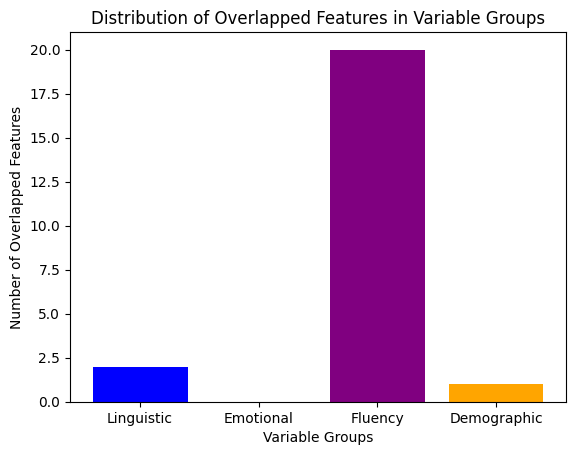

In [36]:
overlapped_linguistic = set(linguistic_variables).intersection(set(overlapped_features_good))
overlapped_emotional = set(emotional_variables).intersection(set(overlapped_features_good))
overlapped_fluency = set(fluency_variables).intersection(set(overlapped_features_good))
overlapped_demographic = set(demographic_variables).intersection(set(overlapped_features_good))

#Bar graph distribution of overlapped features in each group
groups = ['Linguistic', 'Emotional', 'Fluency', 'Demographic']
counts = [
    len(overlapped_linguistic),
    len(overlapped_emotional),
    len(overlapped_fluency),
    len(overlapped_demographic)
]

plt.bar(groups, counts, color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Variable Groups')
plt.ylabel('Number of Overlapped Features')
plt.title('Distribution of Overlapped Features in Variable Groups')
plt.show()

# Interpretation

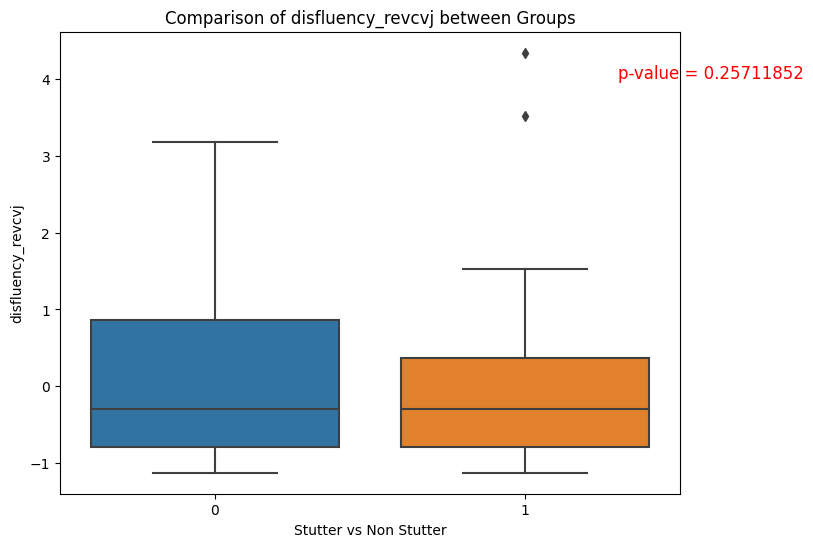

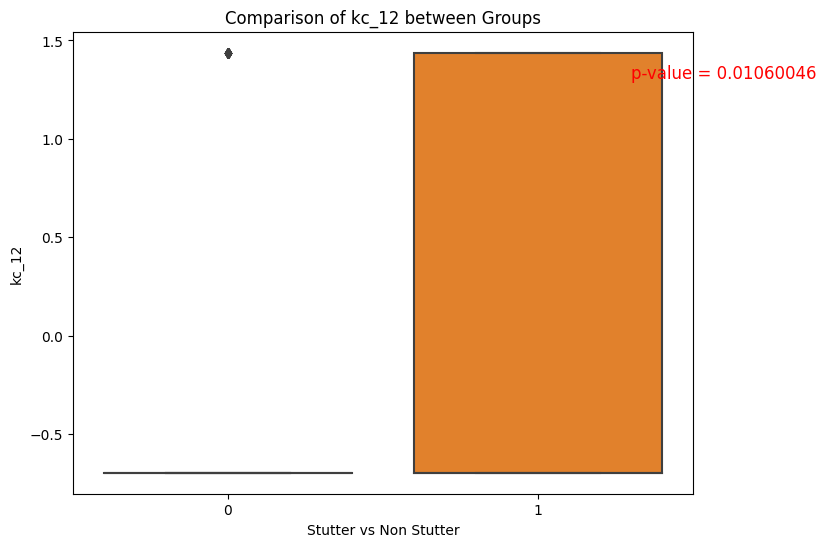

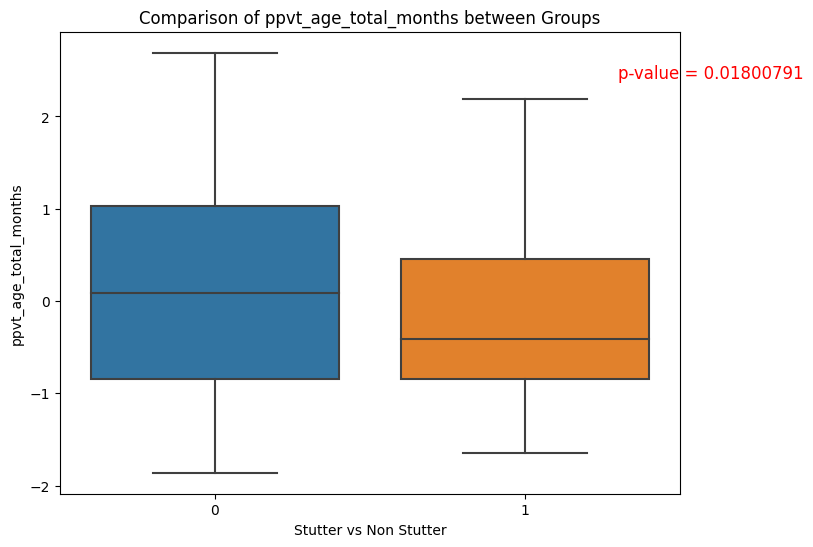

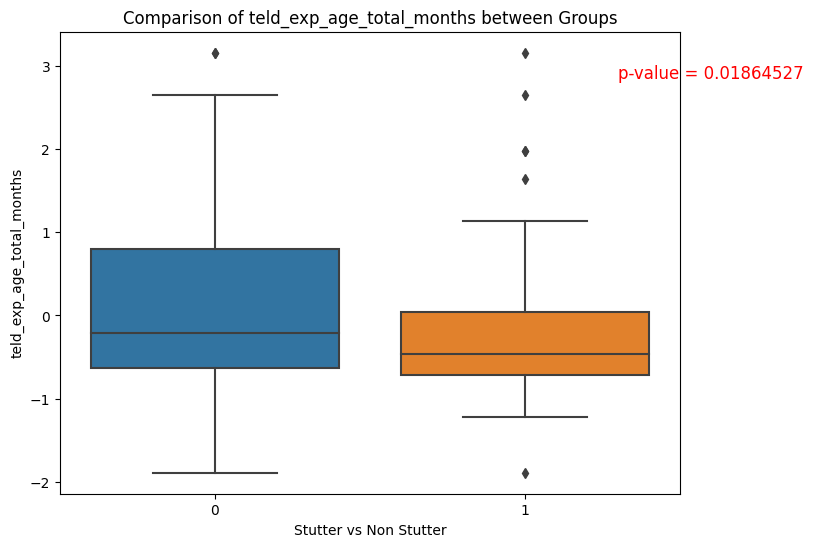

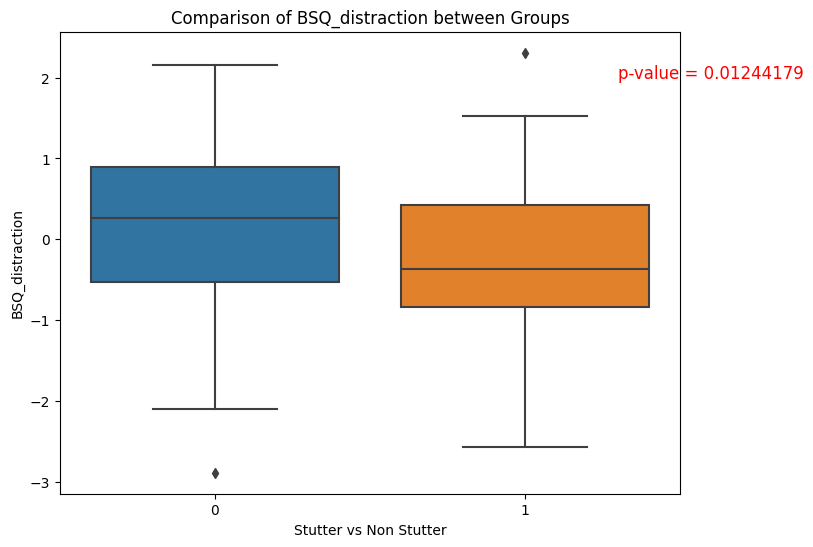

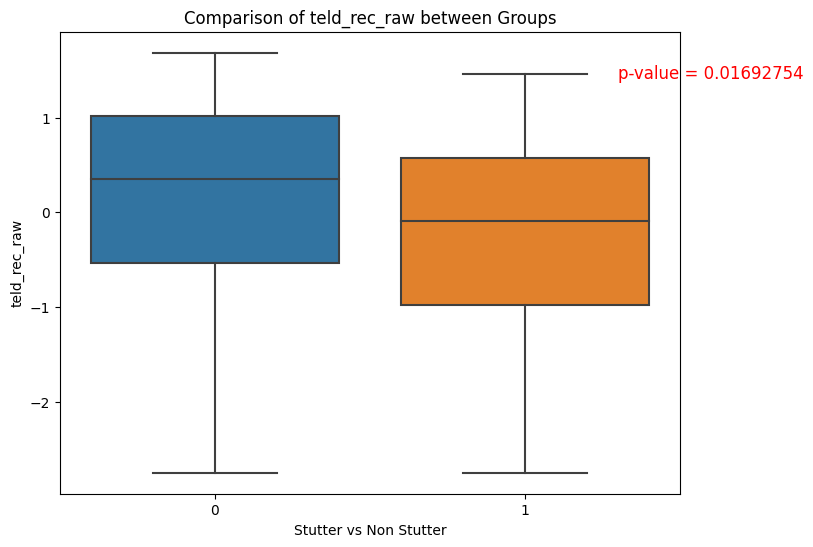

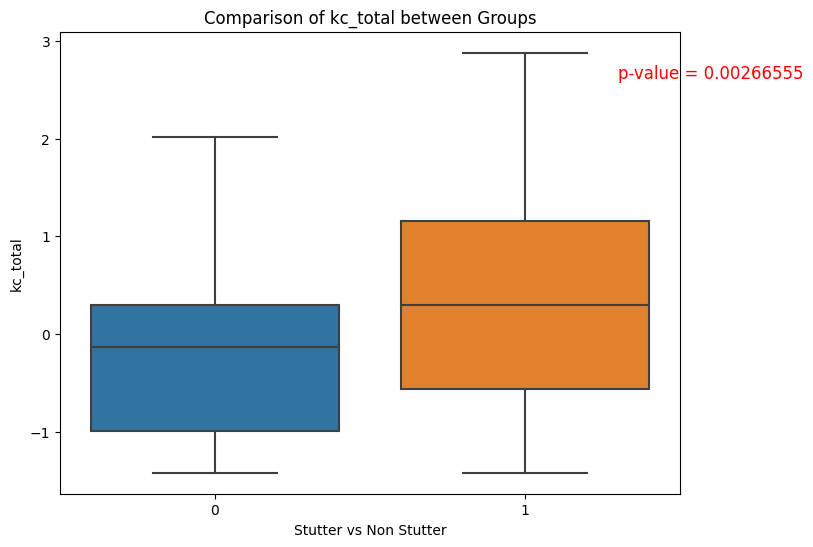

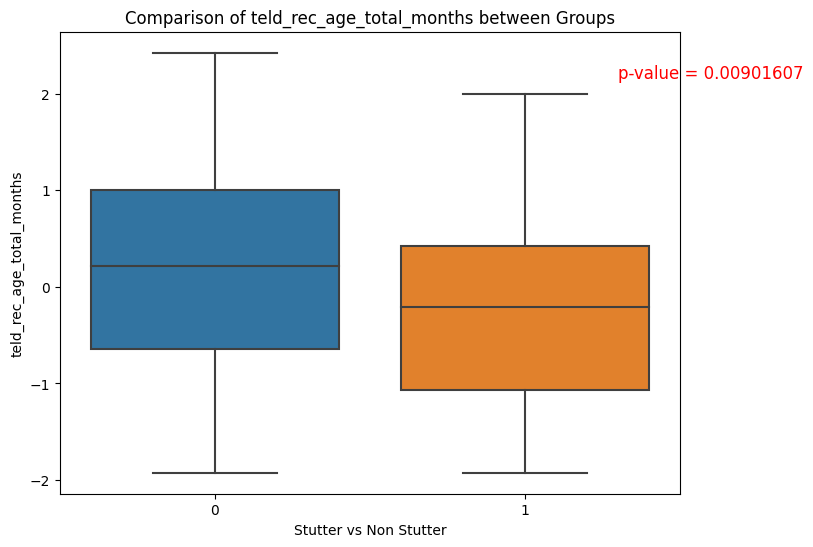

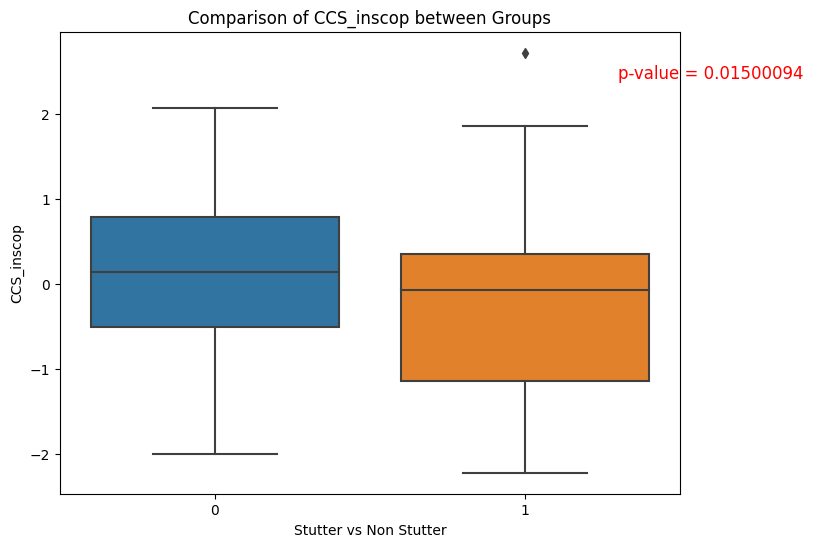

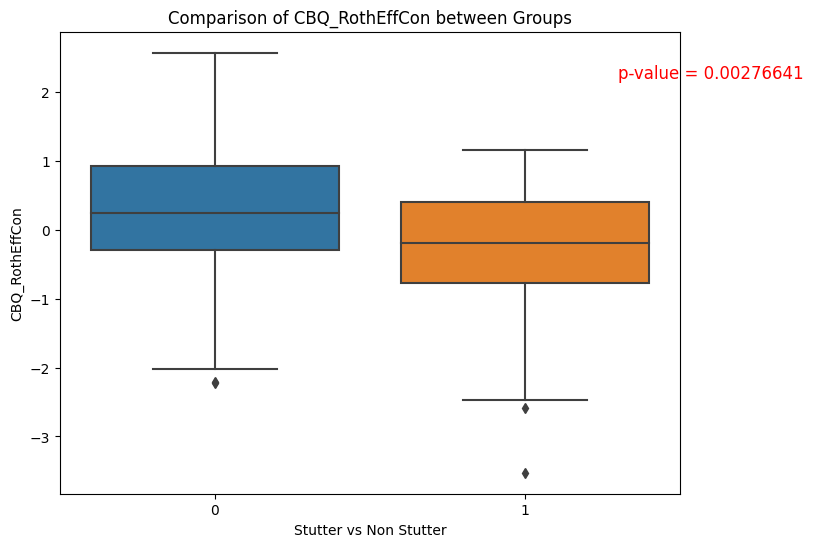

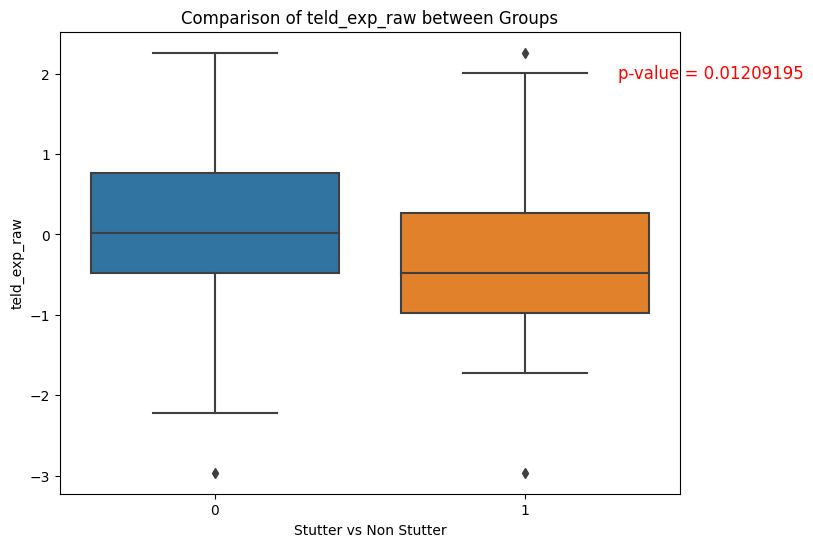

In [32]:
#Compare between the 2 groups of any effect size using boxplots
from scipy import stats

for feature in overlapped_features_any:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='talkergroup_SSI', y=feature, data=data)

    group1 = data[data['talkergroup_SSI'] == 1][feature]
    group2 = data[data['talkergroup_SSI'] == 0][feature]

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    p_value /= 2

    plt.text(
        0.9, 0.9, f'p-value = {p_value:.8f}',
        transform=ax.transAxes, fontsize=12, color='red'
    )

    plt.xlabel('Stutter vs Non Stutter')
    plt.ylabel(feature)
    plt.title(f'Comparison of {feature} between Groups')
    plt.show()


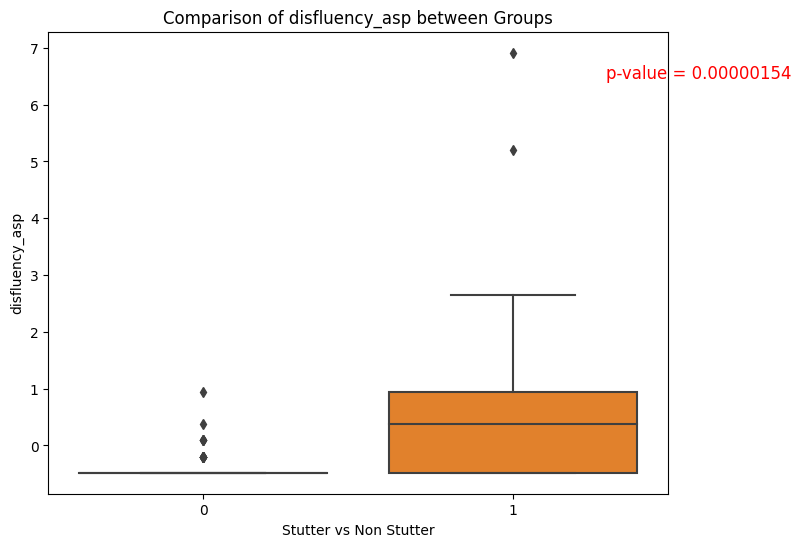

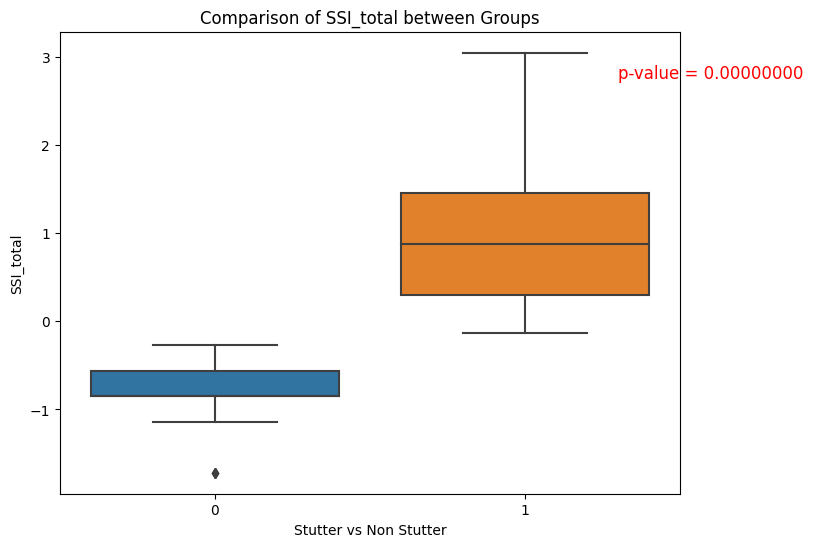

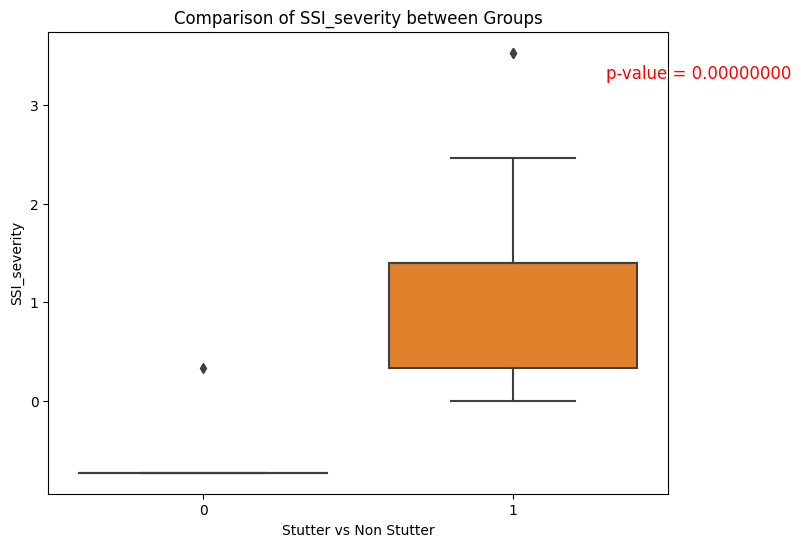

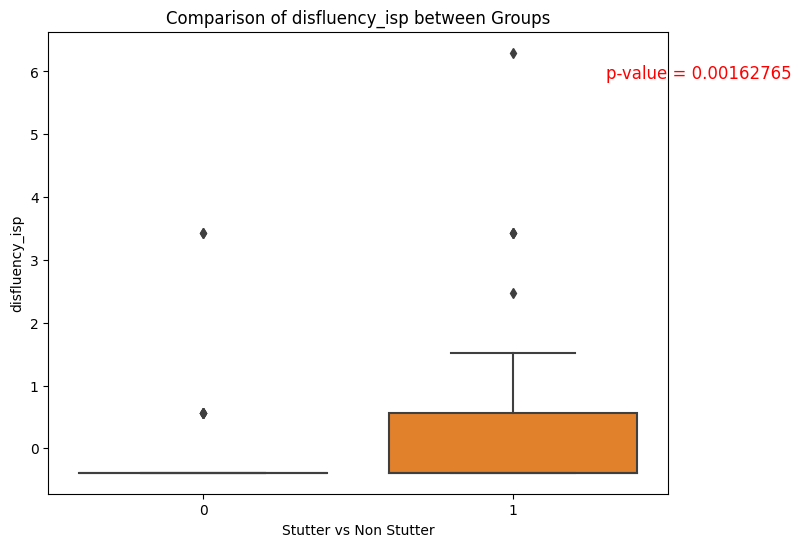

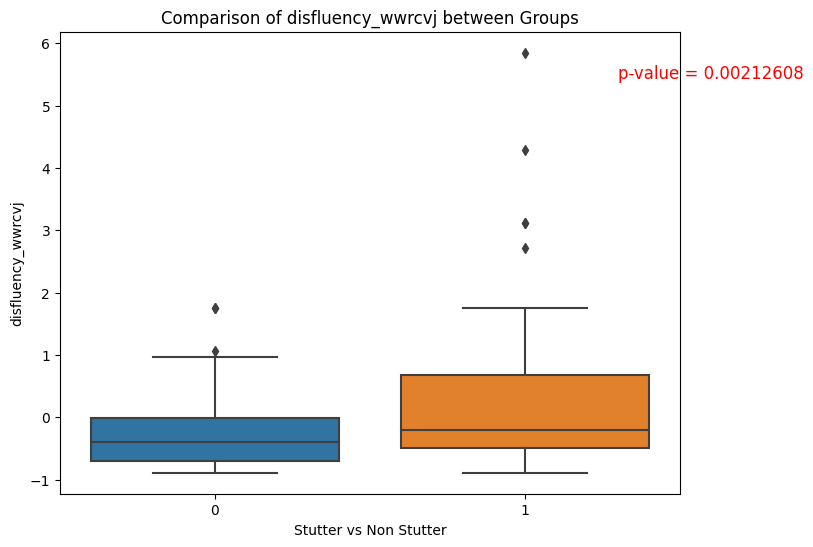

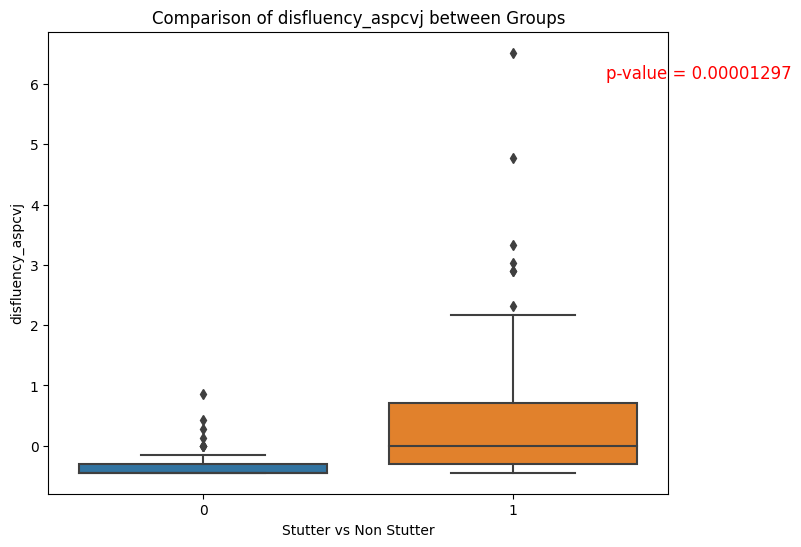

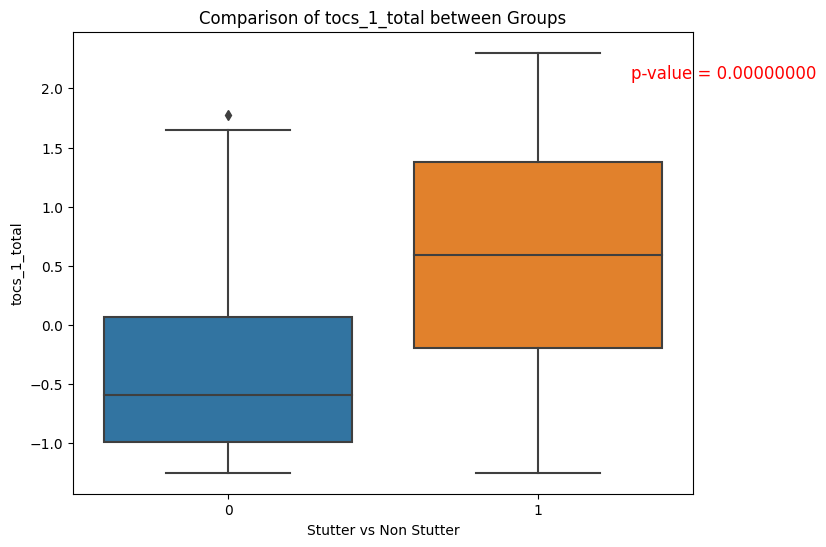

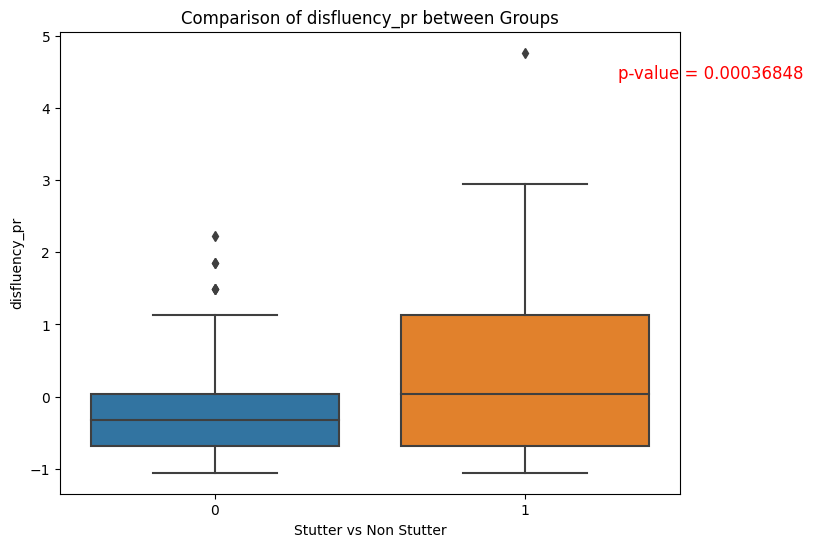

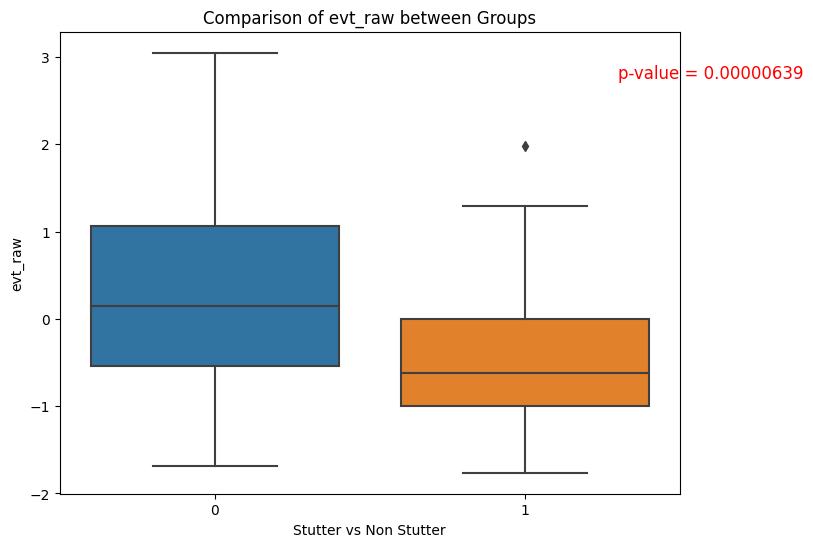

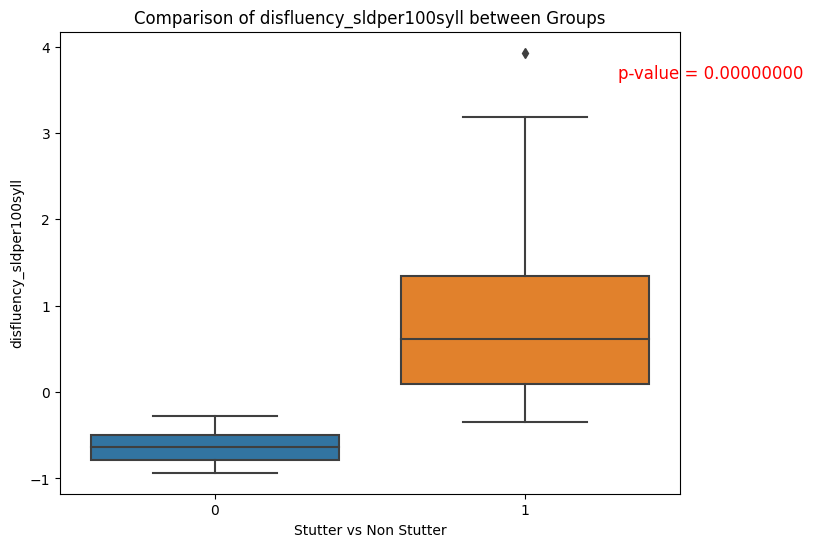

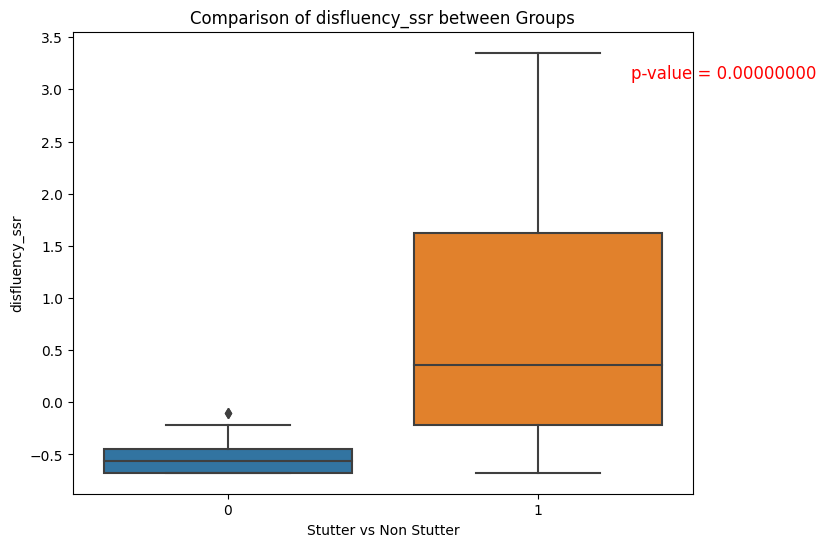

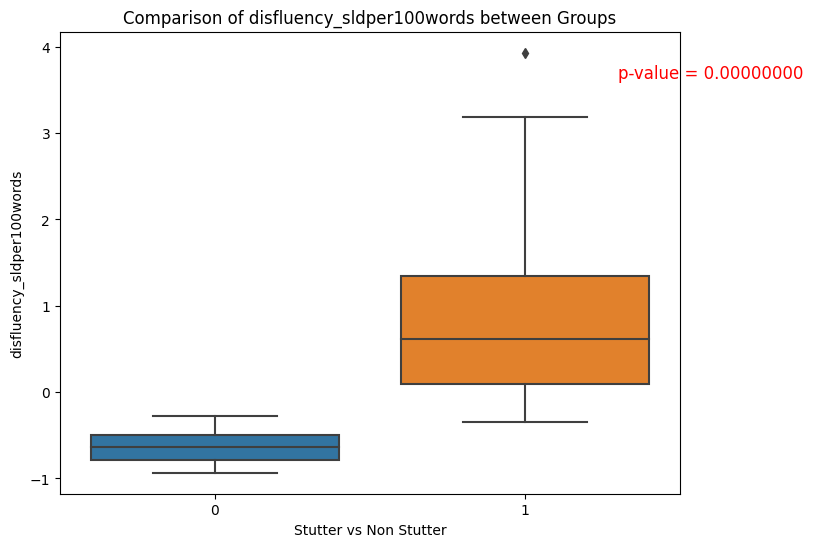

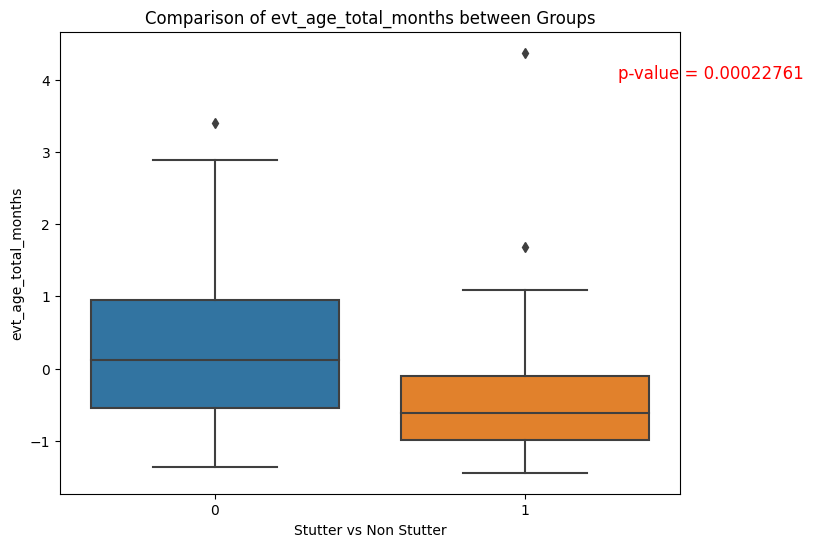

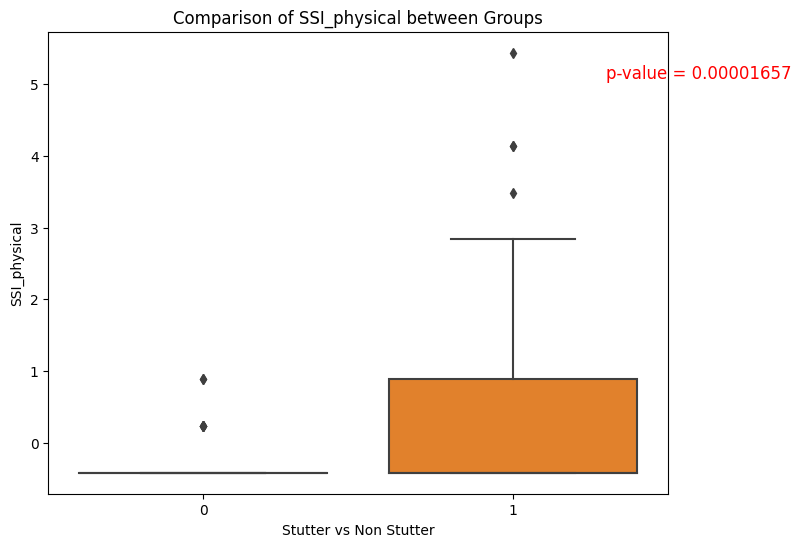

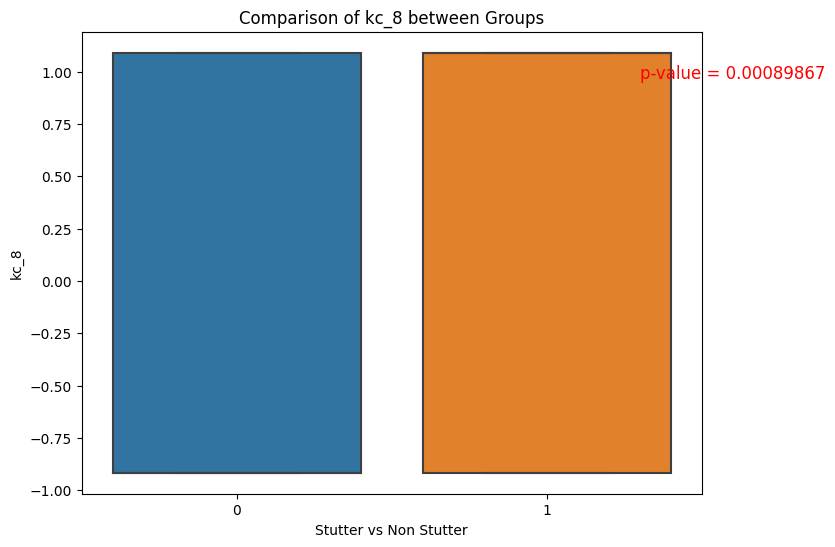

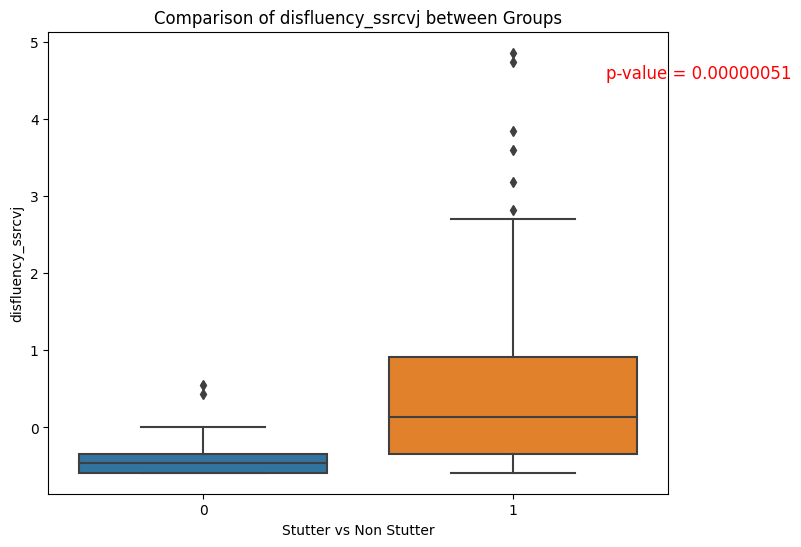

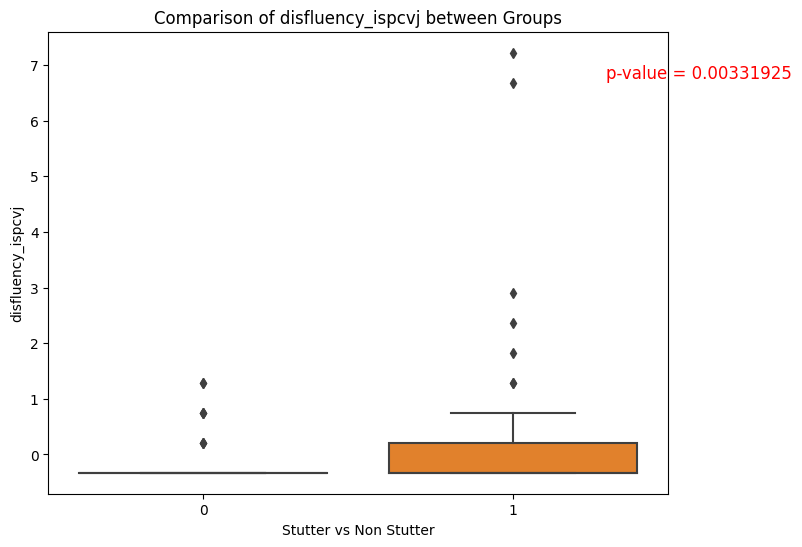

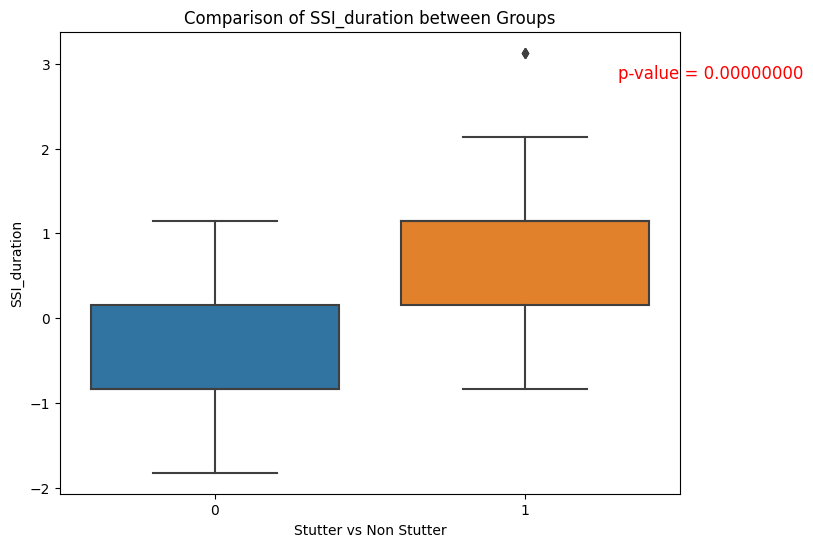

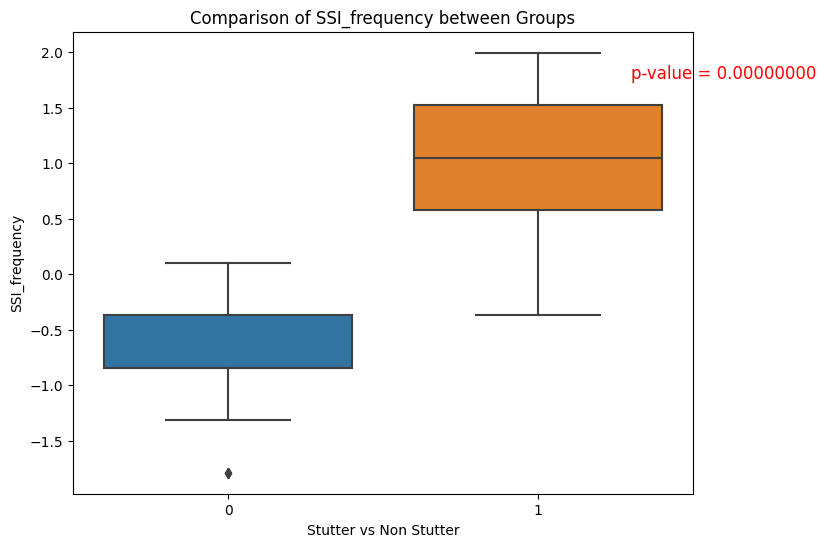

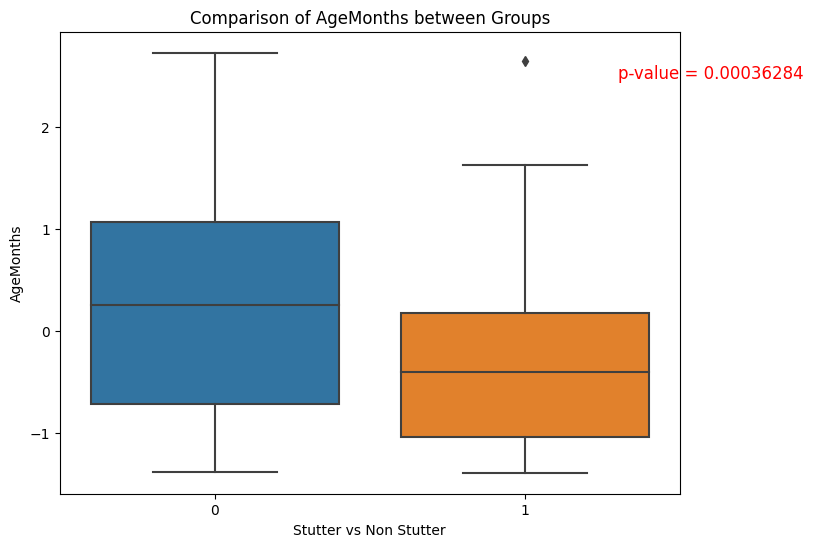

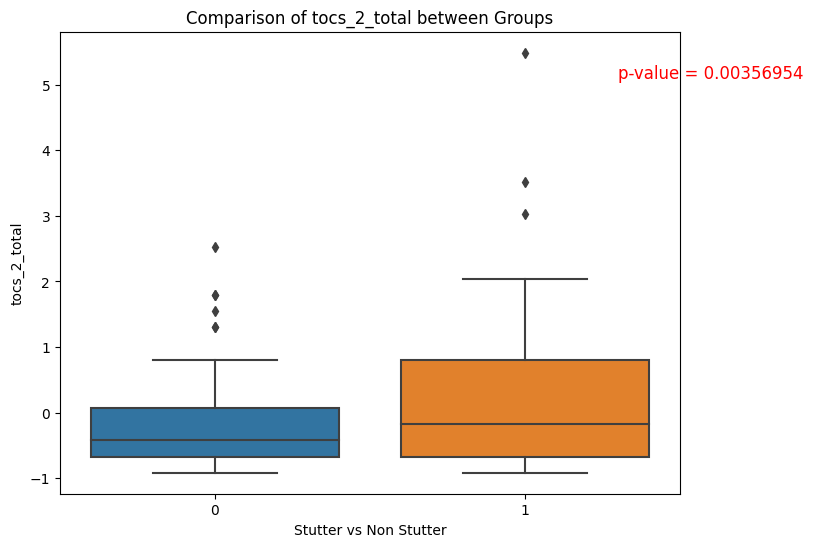

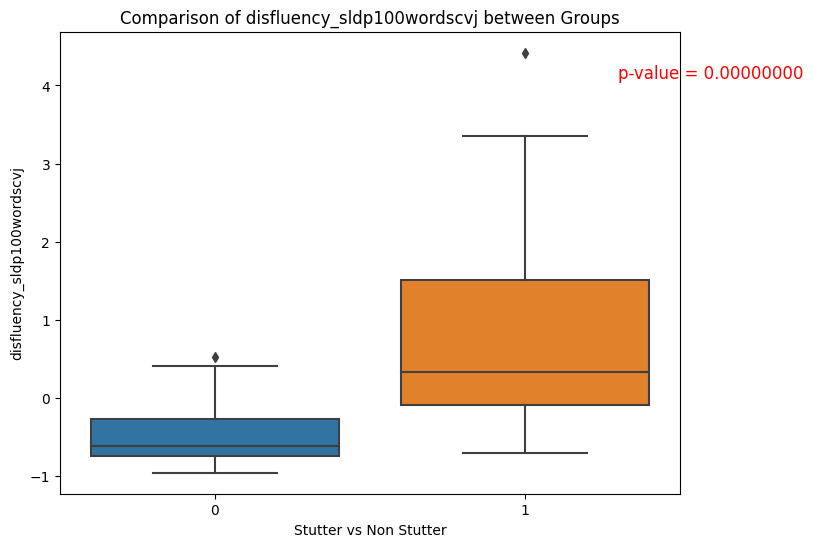

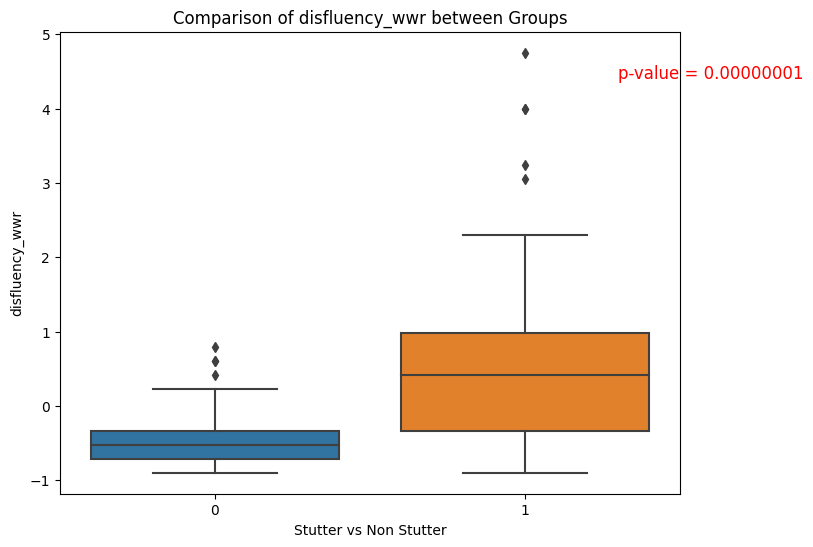

In [ ]:
#Compare between the 2 groups of good effect size using boxplots
for feature in overlapped_features_good:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='talkergroup_SSI', y=feature, data=data)

    group1 = data[data['talkergroup_SSI'] == 1][feature]
    group2 = data[data['talkergroup_SSI'] == 0][feature]

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    p_value /= 2

    plt.text(
        0.9, 0.9, f'p-value = {p_value:.8f}',
        transform=ax.transAxes, fontsize=12, color='red'
    )

    plt.xlabel('Stutter vs Non Stutter')
    plt.ylabel(feature)
    plt.title(f'Comparison of {feature} between Groups')
    plt.show()


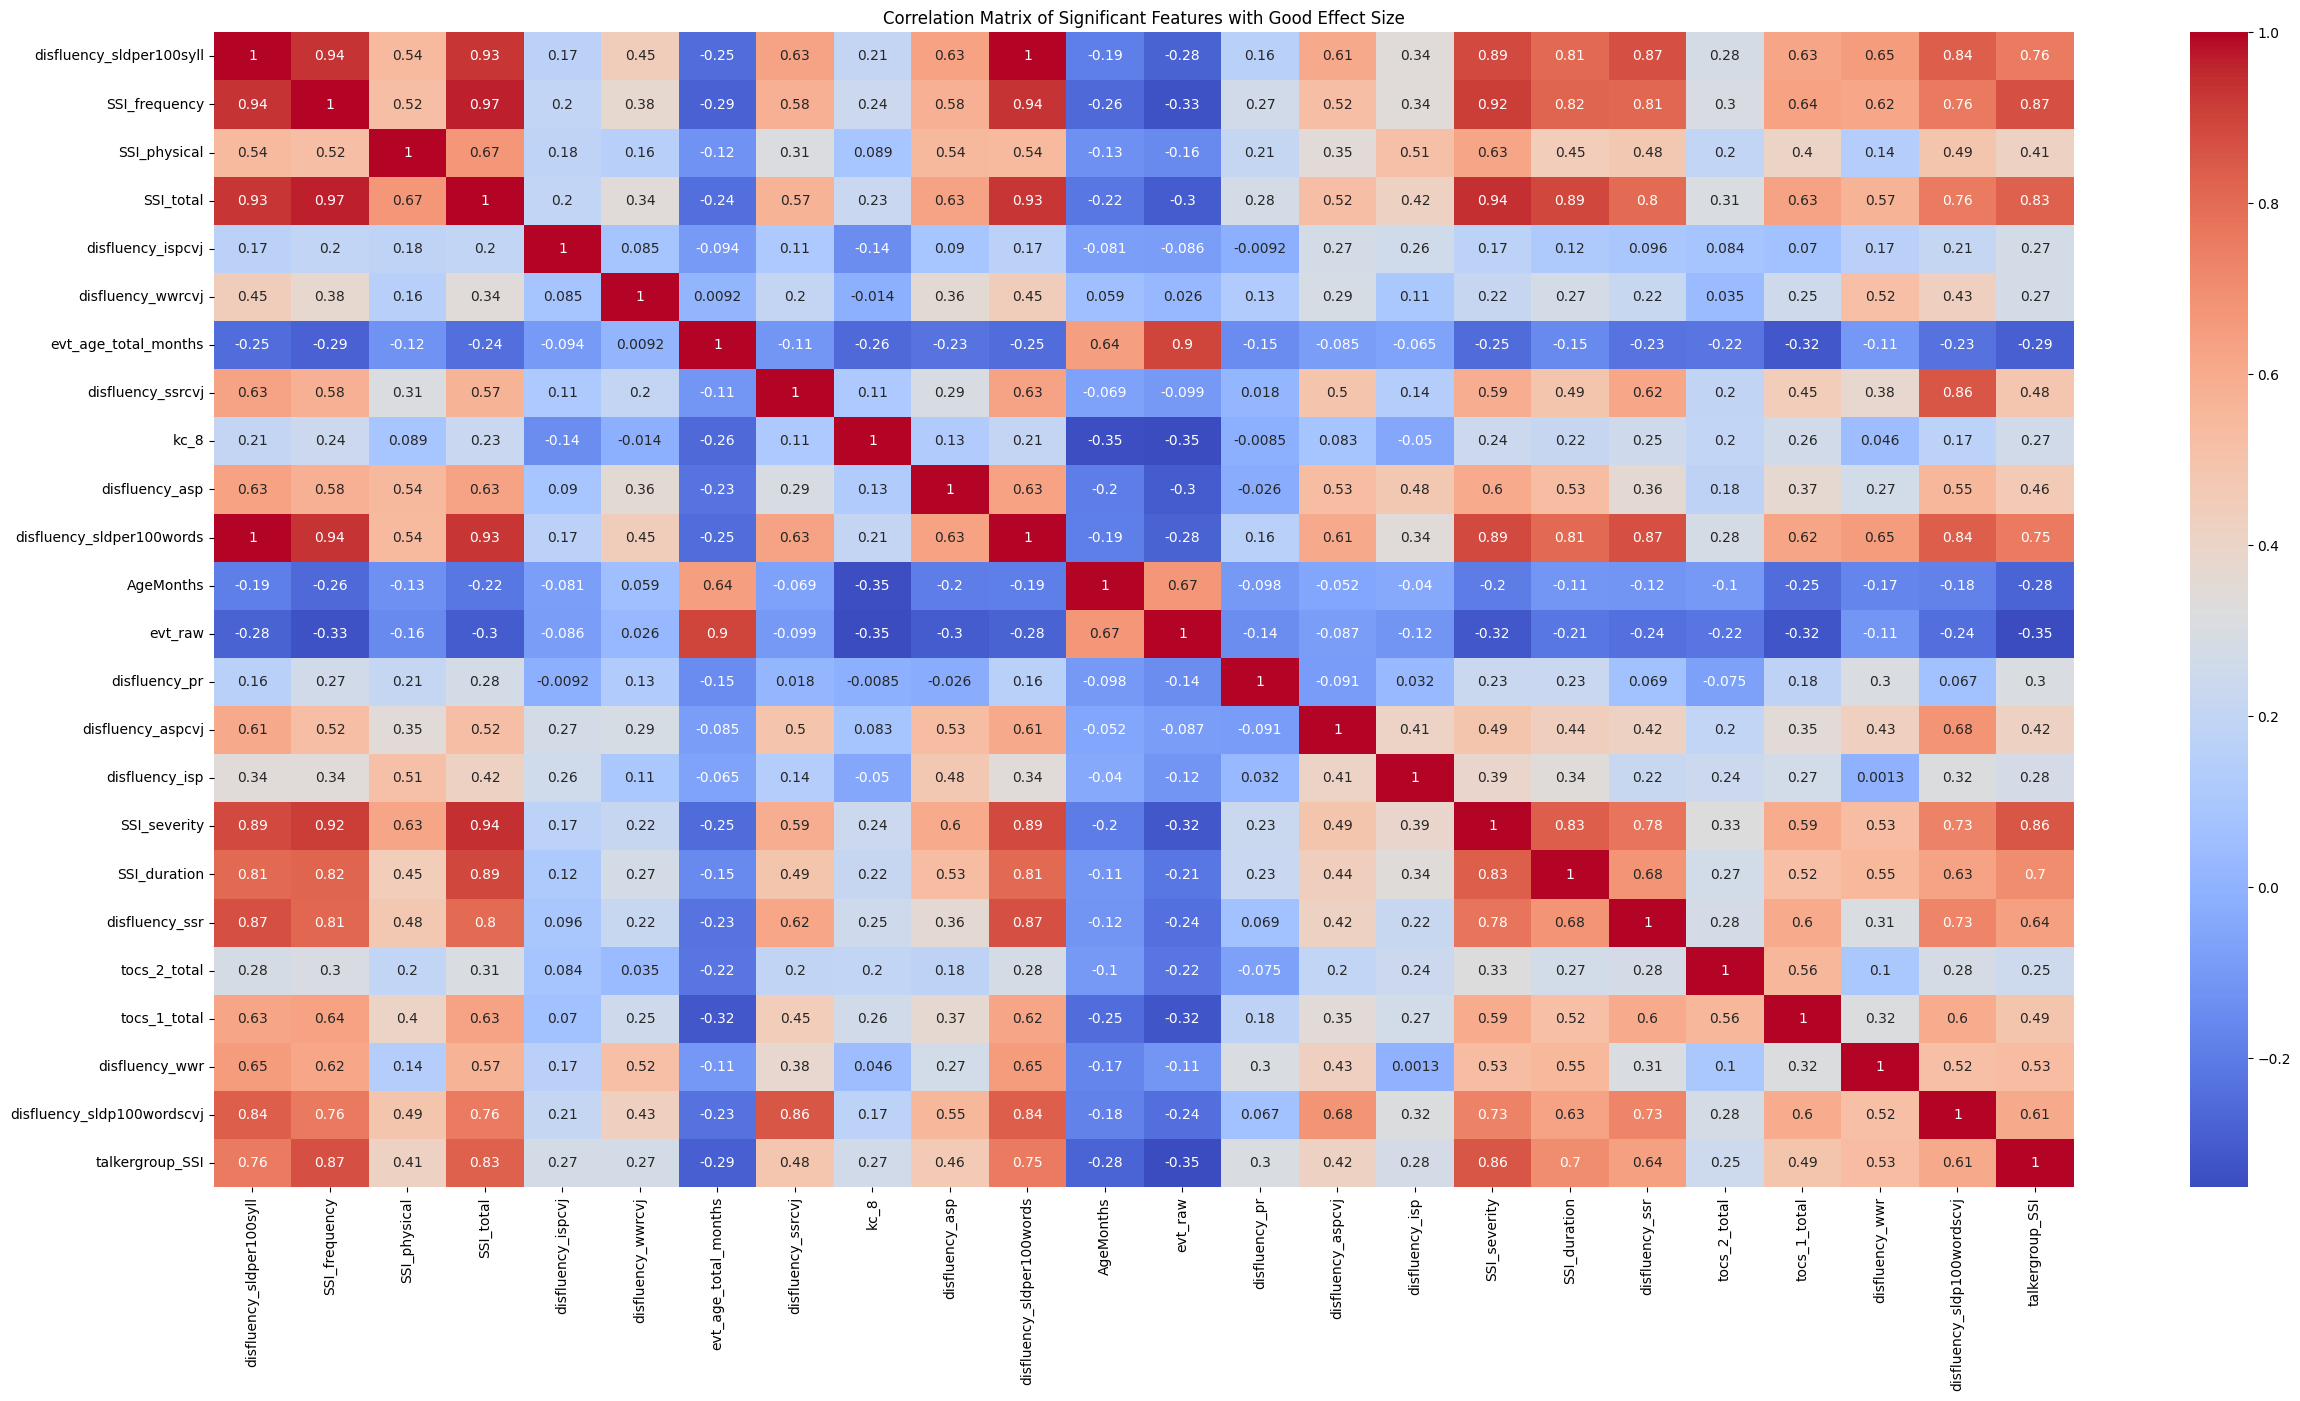

Highly Correlated Pairs:
disfluency_sldper100words - disfluency_sldper100syll: 1.00
SSI_total - SSI_frequency: 0.97
SSI_severity - SSI_total: 0.94
SSI_frequency - disfluency_sldper100syll: 0.94
disfluency_sldper100words - SSI_frequency: 0.94
SSI_total - disfluency_sldper100syll: 0.93
disfluency_sldper100words - SSI_total: 0.93
SSI_severity - SSI_frequency: 0.92
evt_raw - evt_age_total_months: 0.90
SSI_duration - SSI_total: 0.89
SSI_severity - disfluency_sldper100syll: 0.89
SSI_severity - disfluency_sldper100words: 0.89
talkergroup_SSI - SSI_frequency: 0.87
disfluency_ssr - disfluency_sldper100syll: 0.87
disfluency_ssr - disfluency_sldper100words: 0.87
talkergroup_SSI - SSI_severity: 0.86
disfluency_sldp100wordscvj - disfluency_ssrcvj: 0.86
disfluency_sldp100wordscvj - disfluency_sldper100words: 0.84
disfluency_sldp100wordscvj - disfluency_sldper100syll: 0.84
SSI_duration - SSI_severity: 0.83
talkergroup_SSI - SSI_total: 0.83
SSI_duration - SSI_frequency: 0.82
disfluency_ssr - SSI_frequ

In [ ]:
#Correlation matrix of significant features with good effect size

overlapped_features_good_effect_size = list(overlapped_features_good)

selected_features_with_target = overlapped_features_good_effect_size + ['talkergroup_SSI']

selected_data = data[selected_features_with_target]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Significant Features with Good Effect Size')
plt.show()

threshold = 0.8
highly_correlated = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            pair = f"{colname_i} - {colname_j}"
            highly_correlated[pair] = correlation_matrix.iloc[i, j]

highly_correlated = sorted(highly_correlated.items(), key=lambda x: abs(x[1]), reverse=True)

print("Highly Correlated Pairs:")
for pair, correlation in highly_correlated:
    print(f"{pair}: {correlation:.2f}")

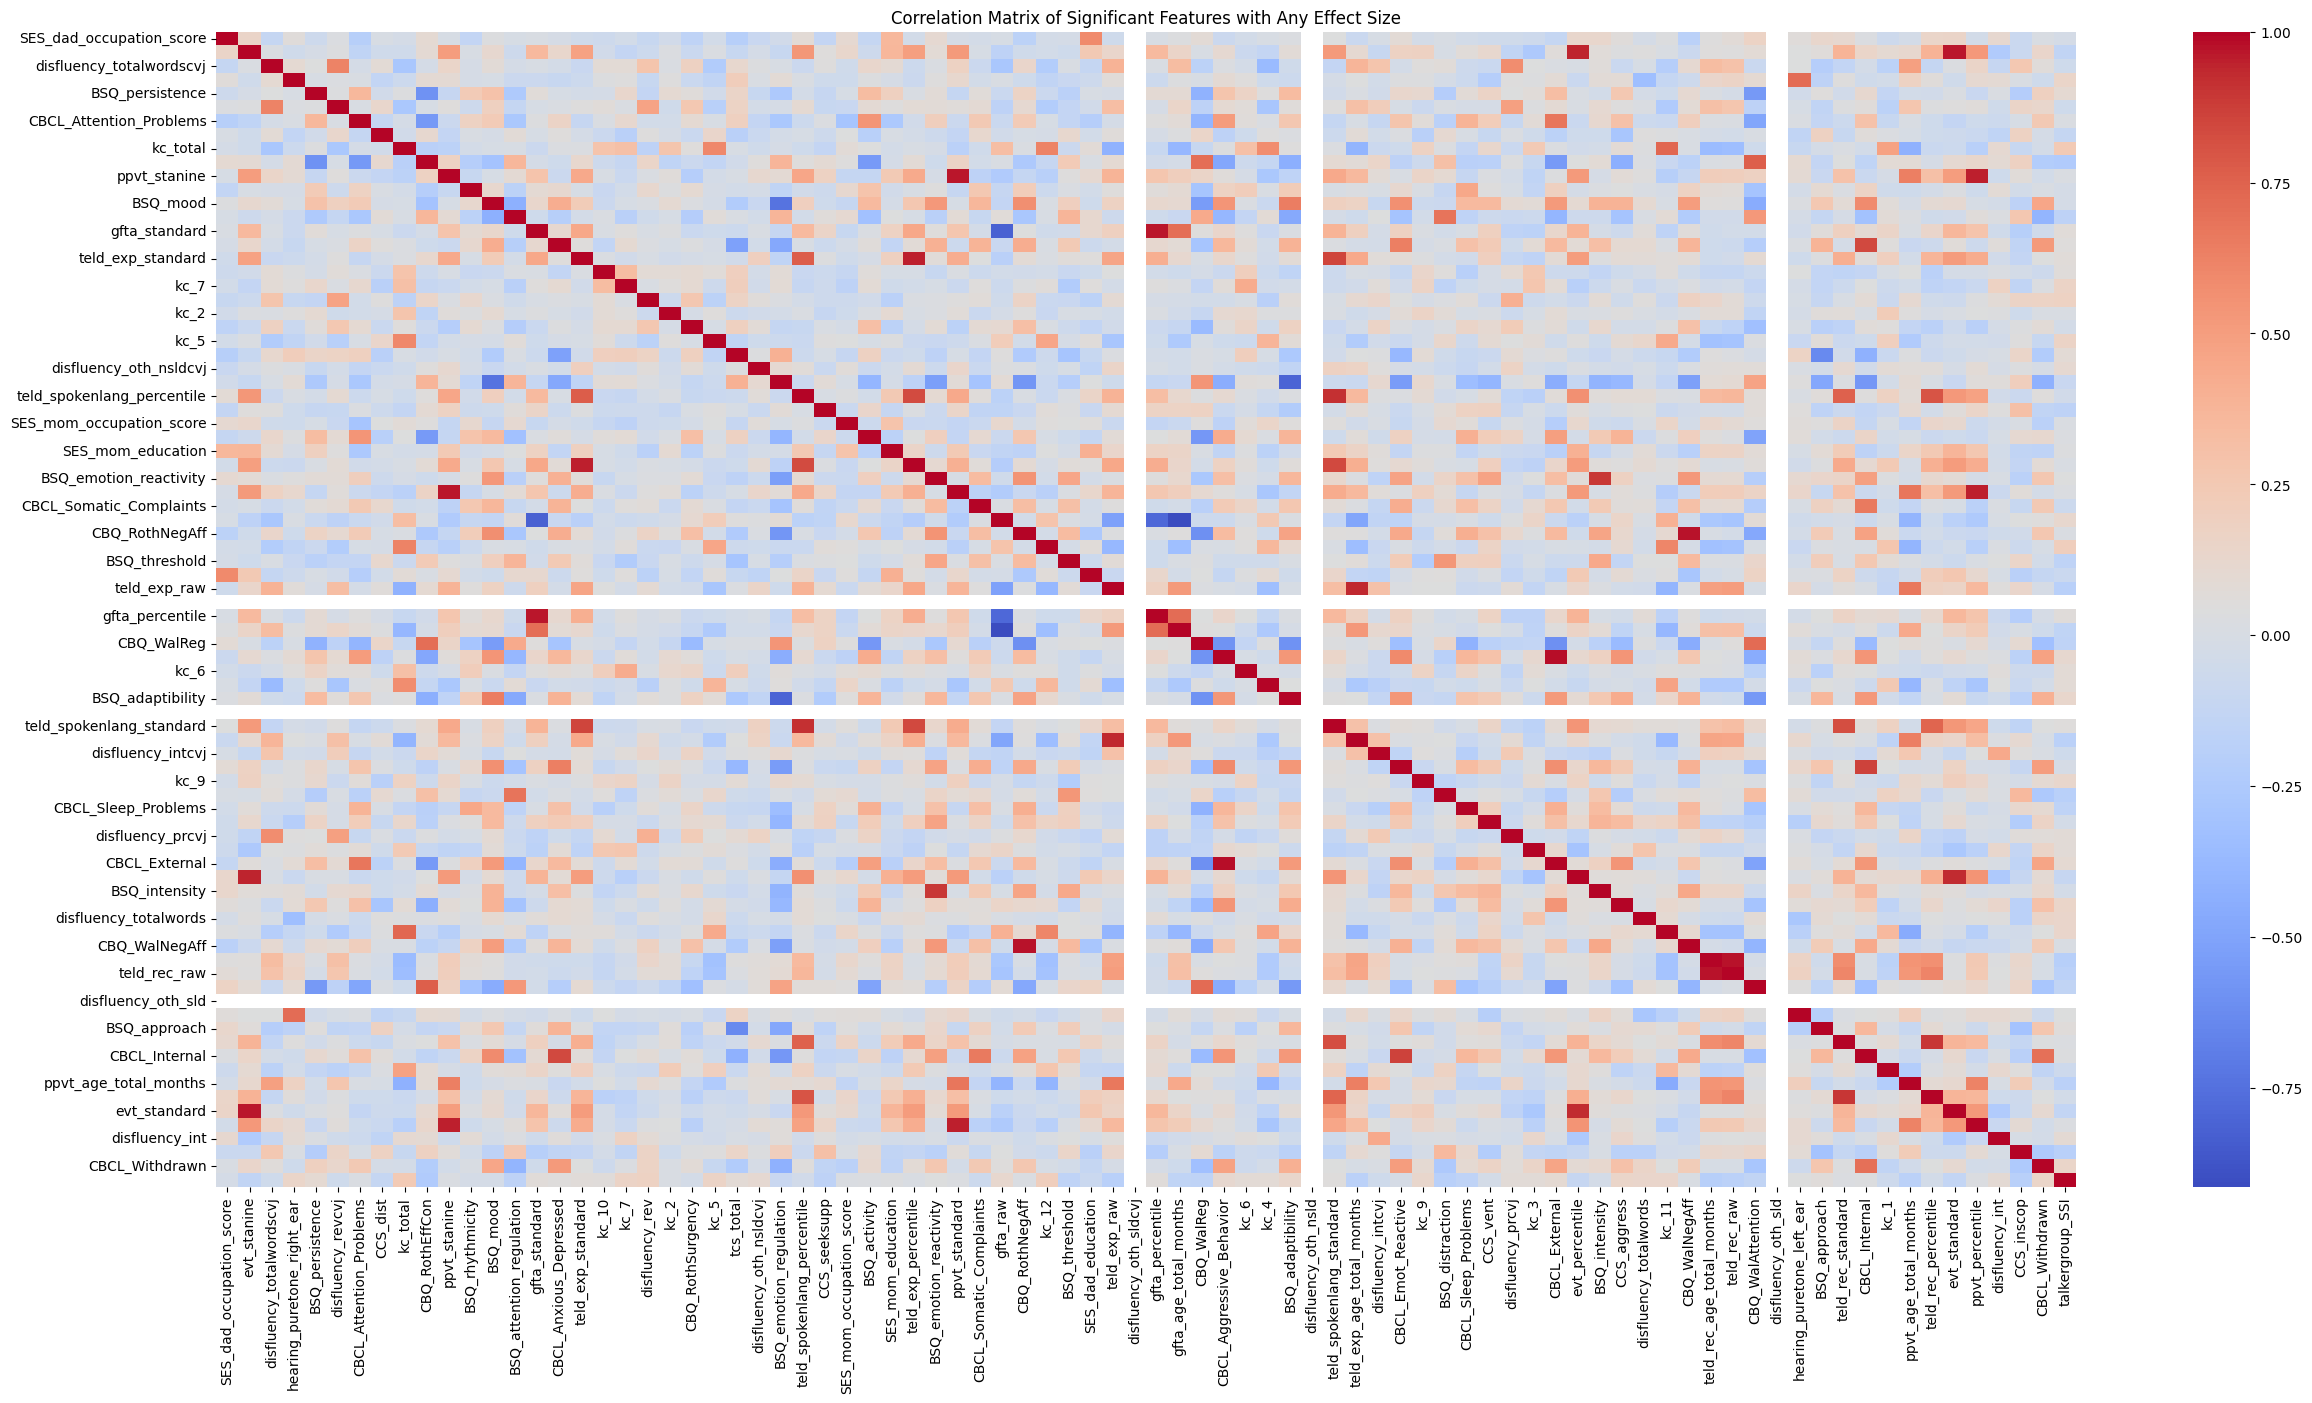

Highly Correlated Pairs:
CBCL_External - CBCL_Aggressive_Behavior: 0.98
CBQ_WalNegAff - CBQ_RothNegAff: 0.98
teld_rec_raw - teld_rec_age_total_months: 0.97
ppvt_standard - ppvt_stanine: 0.97
gfta_percentile - gfta_standard: 0.97
evt_standard - evt_stanine: 0.96
ppvt_percentile - ppvt_stanine: 0.95
ppvt_percentile - ppvt_standard: 0.95
teld_exp_percentile - teld_exp_standard: 0.95
evt_percentile - evt_stanine: 0.94
teld_exp_age_total_months - teld_exp_raw: 0.94
evt_standard - evt_percentile: 0.93
gfta_age_total_months - gfta_raw: -0.91
teld_spokenlang_standard - teld_spokenlang_percentile: 0.91
teld_rec_percentile - teld_rec_standard: 0.90
BSQ_intensity - BSQ_emotion_reactivity: 0.89
CBCL_Internal - CBCL_Emot_Reactive: 0.86
teld_spokenlang_standard - teld_exp_standard: 0.86
CBCL_Internal - CBCL_Anxious_Depressed: 0.84
teld_spokenlang_standard - teld_exp_percentile: 0.84
teld_exp_percentile - teld_spokenlang_percentile: 0.83
teld_rec_standard - teld_spokenlang_standard: 0.82
gfta_raw - g

In [ ]:
#Correlation matrix of significant features with any effect size

overlapped_features_any_effect_size = list(overlapped_features_any)

selected_features_with_target = overlapped_features_any_effect_size + ['talkergroup_SSI']

selected_data = data[selected_features_with_target]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Significant Features with Any Effect Size')
plt.show()

threshold = 0.8
highly_correlated = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            pair = f"{colname_i} - {colname_j}"
            highly_correlated[pair] = correlation_matrix.iloc[i, j]

highly_correlated = sorted(highly_correlated.items(), key=lambda x: abs(x[1]), reverse=True)

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair, correlation in highly_correlated:
    print(f"{pair}: {correlation:.2f}")